In [1]:
!pip install torch numpy matplotlib gymnasium tqdm gitpython
!git clone https://github.com/tARTar78/Decision-Transformer-with-Memory-for-POMDPs.git  # Clone your forked repository


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 104.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [4]:
!python /content/train_and_collect_data.py --env velocity_cartpole --train_timesteps 300000 --num_trajectories 100 --reward_threshold 475

Using optimized parameters for velocity_cartpole
Training recurrent PPO agent from scratch on velocity_cartpole for 300000 timesteps...
Episode 1, reward: 18.00, avg_reward (last 50): 18.00, timesteps: 18/300000
New best model saved with reward: 18.0
Episode 2, reward: 30.00, avg_reward (last 50): 24.00, timesteps: 48/300000
New best model saved with reward: 30.0
Episode 3, reward: 25.00, avg_reward (last 50): 24.33, timesteps: 73/300000
Episode 4, reward: 27.00, avg_reward (last 50): 25.00, timesteps: 100/300000
Episode 5, reward: 21.00, avg_reward (last 50): 24.20, timesteps: 121/300000
Episode 6, reward: 10.00, avg_reward (last 50): 21.83, timesteps: 131/300000
Episode 7, reward: 14.00, avg_reward (last 50): 20.71, timesteps: 145/300000
Episode 8, reward: 15.00, avg_reward (last 50): 20.00, timesteps: 160/300000
Episode 9, reward: 9.00, avg_reward (last 50): 18.78, timesteps: 169/300000
Episode 10, reward: 17.00, avg_reward (last 50): 18.60, timesteps: 186/300000
Episode 11, reward:

In [5]:
!python utils/visualize_ppo_agent.py --env velocity_cartpole --model_path pomdp_datasets/velocity_cartpole/recurrent_ppo_velocity_cartpole.pt --rnn_type gru

Visualization of velocity_cartpole from pomdp_datasets/velocity_cartpole/recurrent_ppo_velocity_cartpole.pt
RNN type: gru, Hidden dim: 128
error: XDG_RUNTIME_DIR not set in the environment.

Episode 1/5
Step 1: Action=0, Value=74.495
Step 2: Action=0, Value=74.495
Step 3: Action=0, Value=74.496
Step 4: Action=0, Value=74.497
Step 5: Action=0, Value=74.497
Step 6: Action=0, Value=74.497
Step 7: Action=1, Value=74.497
Step 8: Action=1, Value=74.497
Step 9: Action=1, Value=74.494
Step 10: Action=1, Value=74.478
Step 11: Action=1, Value=74.442
Step 12: Action=1, Value=74.420
Step 13: Action=1, Value=74.417
Step 14: Action=1, Value=74.430
Step 15: Action=1, Value=74.454
Step 16: Action=1, Value=74.476
Step 17: Action=1, Value=74.489
Step 18: Action=1, Value=74.494
Step 19: Action=1, Value=74.496
Step 20: Action=0, Value=74.497
Step 21: Action=0, Value=74.497
Step 22: Action=0, Value=74.497
Step 23: Action=0, Value=74.497
Step 24: Action=0, Value=74.497
Step 25: Action=0, Value=74.497
Step 2

In [7]:
!python memory_dt.py --dataset pomdp_datasets/velocity_cartpole --stats_only

Analyzing 100 trajectories files in pomdp_datasets/velocity_cartpole
100% 100/100 [00:00<00:00, 2644.98it/s]

Dataset statistics:
Total episodes: 100
Total steps: 49898
Mean reward per episode: 498.98
Median reward per episode: 500.00
Min/Max reward: 478.00/500.00
Reward std: 4.06
Mean episode length: 498.98
Reward percentiles: 
  10%: 500.00
  25%: 500.00
  50%: 500.00
  75%: 500.00
  90%: 500.00
  95%: 500.00
  99%: 500.00
Saved histogram to plots/velocity_cartpole_rewards_histogram.png


In [8]:
# Train basic DT
!python run_memory_dt.py --env velocity_cartpole --memory_type none --n_epochs 7 --eval_episodes 20

# Validate basic DT
!python utils/visualize_dt_agent.py --env velocity_cartpole --model_path models/memory_dt_velocity_cartpole_None_best.pt --memory_type none

Training Memory Decision Transformer on velocity_cartpole...
Dataset stats: total=49838, train=44854, val=4984, state_dim=2, actions=2
Epoch 1/7 [Train]: 100% 701/701 [03:02<00:00,  3.84it/s, loss=0.4880, avg_loss=0.5299, lr=0.000994]
Epoch 1/7: Train Loss=0.5299, Val Loss=0.4692
Running environment validation...
Episode 1: Return=59.0, Steps=59
Episode 2: Return=61.0, Steps=61
Episode 3: Return=70.0, Steps=70
Episode 4: Return=80.0, Steps=80
Episode 5: Return=79.0, Steps=79
Episode 6: Return=35.0, Steps=35
Episode 7: Return=50.0, Steps=50
Episode 8: Return=66.0, Steps=66
Episode 9: Return=77.0, Steps=77
Episode 10: Return=62.0, Steps=62
Validation: Mean Return=63.90, Success Rate=0.00%
New best model with return 63.90
Epoch 2/7 [Train]: 100% 701/701 [02:52<00:00,  4.05it/s, loss=0.4172, avg_loss=0.4722, lr=0.000898]
Epoch 2/7: Train Loss=0.4722, Val Loss=0.4530
Running environment validation...
Episode 1: Return=125.0, Steps=125
Episode 2: Return=129.0, Steps=129
Episode 3: Return=154

In [10]:
# Train DT+GRU (0.1 points)
!python run_memory_dt.py --env velocity_cartpole --memory_type gru --n_epochs 7 --eval_episodes 20


Training Memory Decision Transformer on velocity_cartpole...
Dataset stats: total=49838, train=44854, val=4984, state_dim=2, actions=2
Epoch 1/7 [Train]: 100% 701/701 [03:07<00:00,  3.73it/s, loss=0.4429, avg_loss=0.5405, lr=0.000994]
Epoch 1/7: Train Loss=0.5405, Val Loss=0.4861
Running environment validation...
Episode 1: Return=8.0, Steps=8
Episode 2: Return=8.0, Steps=8
Episode 3: Return=9.0, Steps=9
Episode 4: Return=10.0, Steps=10
Episode 5: Return=10.0, Steps=10
Episode 6: Return=9.0, Steps=9
Episode 7: Return=9.0, Steps=9
Episode 8: Return=8.0, Steps=8
Episode 9: Return=10.0, Steps=10
Episode 10: Return=8.0, Steps=8
Validation: Mean Return=8.90, Success Rate=0.00%
New best model with return 8.90
Epoch 2/7 [Train]: 100% 701/701 [03:09<00:00,  3.70it/s, loss=0.4118, avg_loss=0.4521, lr=0.000898]
Epoch 2/7: Train Loss=0.4521, Val Loss=0.4386
Running environment validation...
Episode 1: Return=8.0, Steps=8
Episode 2: Return=9.0, Steps=9
Episode 3: Return=10.0, Steps=10
Episode 4: R

In [12]:
# Train DT+LSTM (0.1 points)
!python run_memory_dt.py --env velocity_cartpole --memory_type lstm --n_epochs 7 --eval_episodes 20

Training Memory Decision Transformer on velocity_cartpole...
Dataset stats: total=49838, train=44854, val=4984, state_dim=2, actions=2
Epoch 1/7 [Train]: 100% 701/701 [03:01<00:00,  3.86it/s, loss=0.4539, avg_loss=0.5221, lr=0.000994]
Epoch 1/7: Train Loss=0.5221, Val Loss=0.4728
Running environment validation...
Episode 1: Return=500.0, Steps=500
Episode 2: Return=24.0, Steps=24
Episode 3: Return=500.0, Steps=500
Episode 4: Return=497.0, Steps=497
Episode 5: Return=184.0, Steps=184
Episode 6: Return=496.0, Steps=496
Episode 7: Return=500.0, Steps=500
Episode 8: Return=500.0, Steps=500
Episode 9: Return=500.0, Steps=500
Episode 10: Return=500.0, Steps=500
Validation: Mean Return=420.10, Success Rate=80.00%
New best model with return 420.10
Epoch 2/7 [Train]: 100% 701/701 [03:03<00:00,  3.82it/s, loss=0.4395, avg_loss=0.4515, lr=0.000898]
Epoch 2/7: Train Loss=0.4515, Val Loss=0.4372
Running environment validation...
Episode 1: Return=10.0, Steps=10
Episode 2: Return=132.0, Steps=132
Ep

In [13]:
!python utils/visualize_dt_agent.py --env velocity_cartpole --model_path models/memory_dt_velocity_cartpole_gru_best.pt --memory_type gru

Model parameters: n_embed=64, n_layer=3, n_head=4, memory_dim=64
action_head structure: Linear
Visualizing velocity_cartpole agent from models/memory_dt_velocity_cartpole_gru_best.pt
Memory type: gru, Context length: 20
error: XDG_RUNTIME_DIR not set in the environment.

Episode 1/5
Target return: 500.0
Step 1: Initial action=0 (default)
Step 2: Action=0, RTG=499.00
Step 3: Action=0, RTG=498.00
Step 4: Action=0, RTG=497.00
Step 5: Action=0, RTG=496.00
Step 6: Action=0, RTG=495.00
Step 7: Action=1, RTG=494.00
Step 8: Action=1, RTG=493.00
Step 9: Action=1, RTG=492.00
Step 10: Action=1, RTG=491.00
Step 11: Action=1, RTG=490.00
Episode 1 finished with reward: 11.0

Episode 2/5
Target return: 500.0
Step 1: Initial action=0 (default)
Step 2: Action=0, RTG=499.00
Step 3: Action=0, RTG=498.00
Step 4: Action=0, RTG=497.00
Step 5: Action=0, RTG=496.00
Step 6: Action=0, RTG=495.00
Step 7: Action=1, RTG=494.00
Step 8: Action=1, RTG=493.00
Step 9: Action=1, RTG=492.00
Step 10: Action=1, RTG=491.00


In [14]:
!python utils/visualize_dt_agent.py --env velocity_cartpole --model_path models/memory_dt_velocity_cartpole_lstm_best.pt --memory_type lstm

Model parameters: n_embed=64, n_layer=3, n_head=4, memory_dim=64
action_head structure: Linear
Visualizing velocity_cartpole agent from models/memory_dt_velocity_cartpole_lstm_best.pt
Memory type: lstm, Context length: 20
error: XDG_RUNTIME_DIR not set in the environment.

Episode 1/5
Target return: 500.0
Step 1: Initial action=0 (default)
Step 2: Action=1, RTG=499.00
Step 3: Action=1, RTG=498.00
Step 4: Action=1, RTG=497.00
Step 5: Action=1, RTG=496.00
Step 6: Action=0, RTG=495.00
Step 7: Action=0, RTG=494.00
Step 8: Action=1, RTG=493.00
Step 9: Action=1, RTG=492.00
Step 10: Action=0, RTG=491.00
Step 11: Action=0, RTG=490.00
Step 12: Action=0, RTG=489.00
Step 13: Action=0, RTG=488.00
Step 14: Action=0, RTG=487.00
Step 15: Action=0, RTG=486.00
Step 16: Action=0, RTG=485.00
Step 17: Action=0, RTG=484.00
Step 18: Action=0, RTG=483.00
Step 19: Action=1, RTG=482.00
Step 20: Action=1, RTG=481.00
Step 21: Action=1, RTG=480.00
Step 22: Action=1, RTG=479.00
Step 23: Action=1, RTG=478.00
Step 2

# GRU vs LSTM

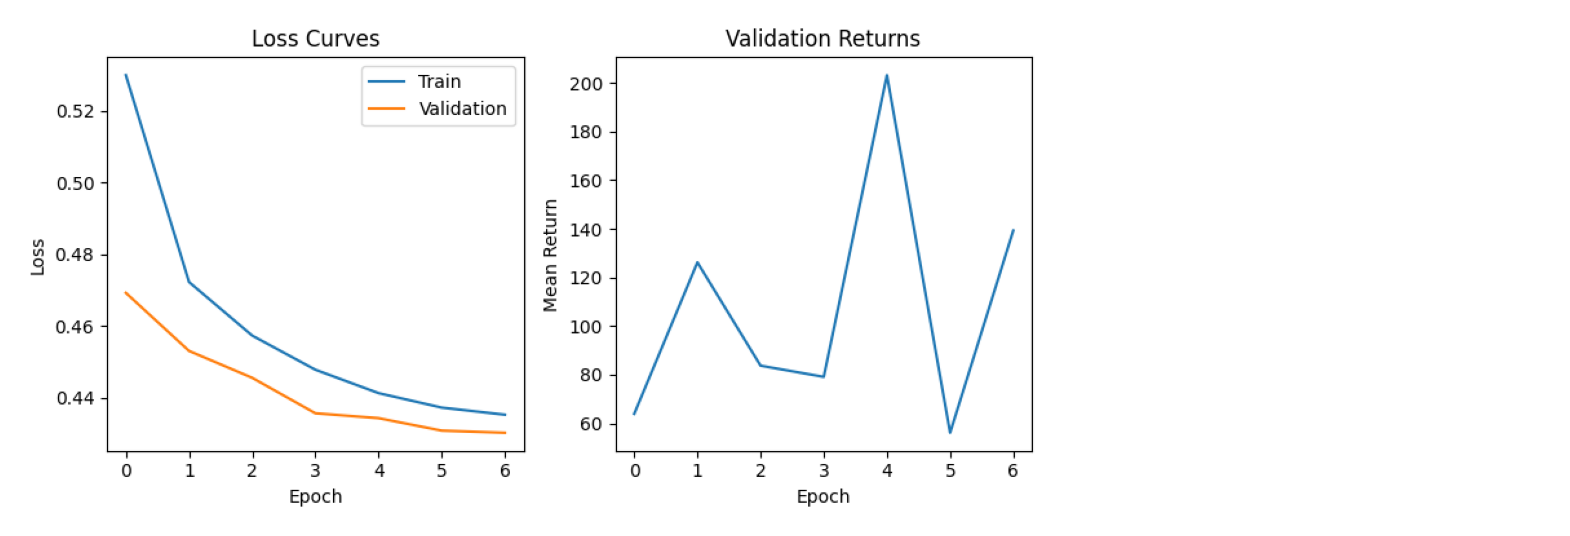

In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(20, 10))
img = mpimg.imread('/content/models/memory_dt_velocity_cartpole_None_training.png')  # Замените на путь к файлу
plt.imshow(img)
plt.axis('off')  # Отключаем оси
plt.show()


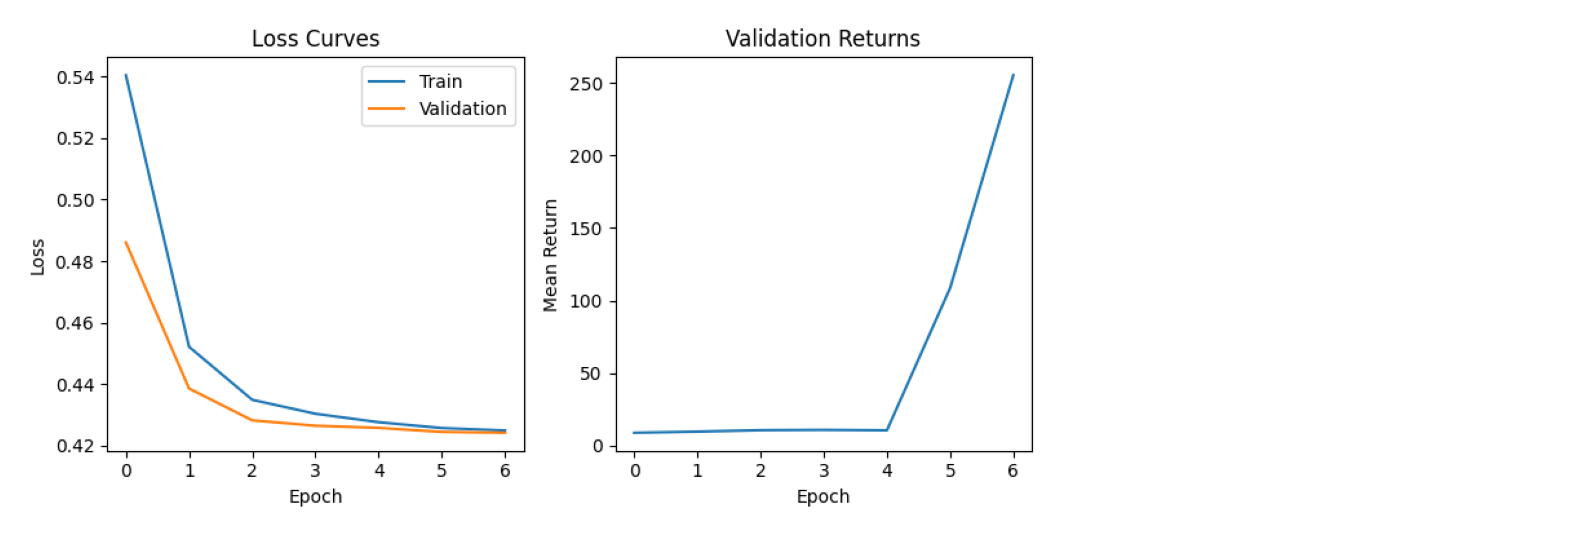

In [19]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(20, 10))
img = mpimg.imread('/content/models/memory_dt_velocity_cartpole_gru_training.png')  # Замените на путь к файлу
plt.imshow(img)
plt.axis('off')  # Отключаем оси
plt.show()


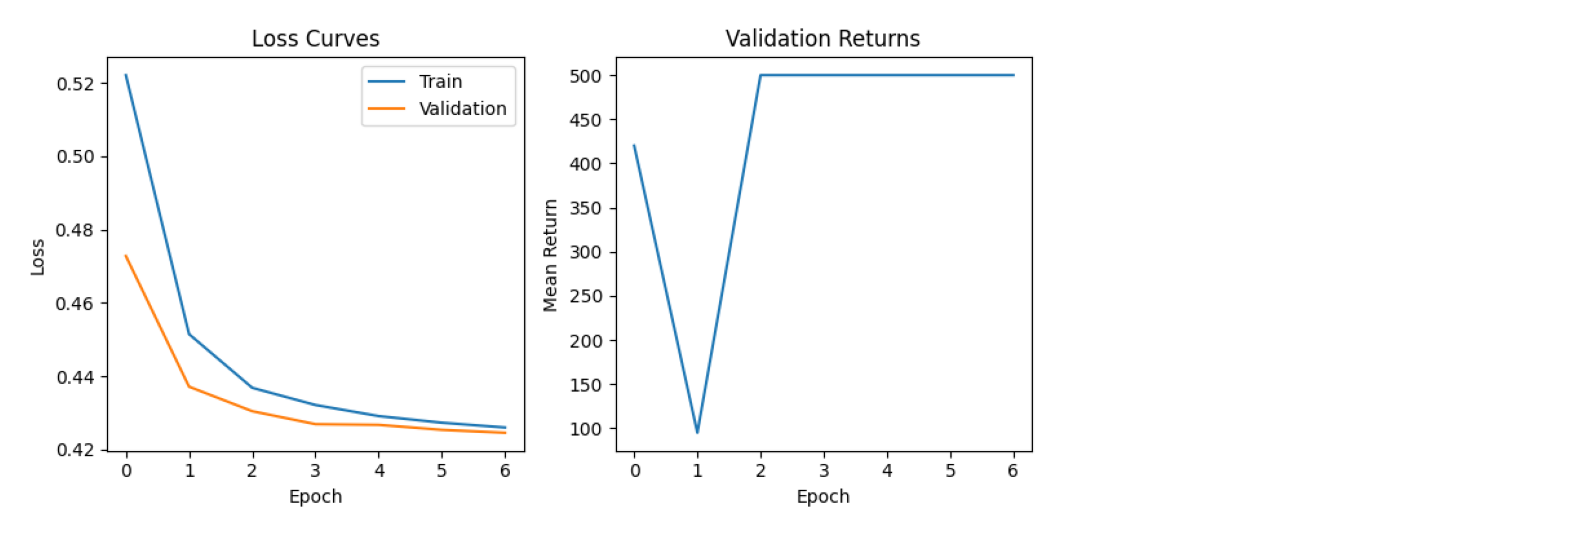

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(20, 10))
img = mpimg.imread('/content/models/memory_dt_velocity_cartpole_lstm_training.png')  # Замените на путь к файлу
plt.imshow(img)
plt.axis('off')  # Отключаем оси
plt.show()


LSTM побеждет. Отметим, что GRU требуется существенный разгон

# reward_treshold

In [24]:
!python /content/train_and_collect_data.py --env velocity_cartpole --train_timesteps 300000 --num_trajectories 100 --reward_threshold 300

Using optimized parameters for velocity_cartpole
Training recurrent PPO agent ignoring existing checkpoint on velocity_cartpole for 300000 timesteps...
Episode 1, reward: 18.00, avg_reward (last 50): 18.00, timesteps: 18/300000
New best model saved with reward: 18.0
Episode 2, reward: 15.00, avg_reward (last 50): 16.50, timesteps: 33/300000
Episode 3, reward: 16.00, avg_reward (last 50): 16.33, timesteps: 49/300000
Episode 4, reward: 52.00, avg_reward (last 50): 25.25, timesteps: 101/300000
New best model saved with reward: 52.0
Episode 5, reward: 40.00, avg_reward (last 50): 28.20, timesteps: 141/300000
Episode 6, reward: 25.00, avg_reward (last 50): 27.67, timesteps: 166/300000
Episode 7, reward: 15.00, avg_reward (last 50): 25.86, timesteps: 181/300000
Episode 8, reward: 18.00, avg_reward (last 50): 24.88, timesteps: 199/300000
Episode 9, reward: 17.00, avg_reward (last 50): 24.00, timesteps: 216/300000
Episode 10, reward: 21.00, avg_reward (last 50): 23.70, timesteps: 237/300000
Ep

In [25]:
!python utils/visualize_ppo_agent.py --env velocity_cartpole --model_path pomdp_datasets/velocity_cartpole/recurrent_ppo_velocity_cartpole.pt --rnn_type gru

Visualization of velocity_cartpole from pomdp_datasets/velocity_cartpole/recurrent_ppo_velocity_cartpole.pt
RNN type: gru, Hidden dim: 128
error: XDG_RUNTIME_DIR not set in the environment.

Episode 1/5
Step 1: Action=0, Value=67.501
Step 2: Action=0, Value=67.625
Step 3: Action=0, Value=67.642
Step 4: Action=0, Value=67.644
Step 5: Action=0, Value=67.648
Step 6: Action=0, Value=67.651
Step 7: Action=1, Value=67.652
Step 8: Action=1, Value=67.646
Step 9: Action=1, Value=67.563
Step 10: Action=1, Value=66.629
Step 11: Action=1, Value=65.061
Step 12: Action=1, Value=65.438
Step 13: Action=1, Value=66.170
Step 14: Action=1, Value=66.651
Step 15: Action=1, Value=67.034
Step 16: Action=1, Value=67.330
Step 17: Action=1, Value=67.515
Step 18: Action=1, Value=67.603
Step 19: Action=1, Value=67.635
Step 20: Action=0, Value=67.644
Step 21: Action=0, Value=67.645
Step 22: Action=0, Value=67.631
Step 23: Action=0, Value=67.598
Step 24: Action=1, Value=67.573
Step 25: Action=1, Value=67.562
Step 2

In [26]:
!python memory_dt.py --dataset pomdp_datasets/velocity_cartpole --stats_only

Analyzing 100 trajectories files in pomdp_datasets/velocity_cartpole
100% 100/100 [00:00<00:00, 3186.65it/s]

Dataset statistics:
Total episodes: 100
Total steps: 45876
Mean reward per episode: 458.76
Median reward per episode: 500.00
Min/Max reward: 301.00/500.00
Reward std: 63.41
Mean episode length: 458.76
Reward percentiles: 
  10%: 351.30
  25%: 414.00
  50%: 500.00
  75%: 500.00
  90%: 500.00
  95%: 500.00
  99%: 500.00
Saved histogram to plots/velocity_cartpole_rewards_histogram.png


In [27]:
# Train basic DT
!python run_memory_dt.py --env velocity_cartpole --memory_type none --n_epochs 7 --eval_episodes 20

# Validate basic DT
#!python utils/visualize_dt_agent.py --env velocity_cartpole --model_path models/memory_dt_velocity_cartpole_None2_best.pt --memory_type none


!python run_memory_dt.py --env velocity_cartpole --memory_type gru --n_epochs 7 --eval_episodes 20

#!python utils/visualize_dt_agent.py --env velocity_cartpole --model_path models/memory_dt_velocity_cartpole_gru2_best.pt --memory_type gru


!python run_memory_dt.py --env velocity_cartpole --memory_type lstm --n_epochs 7 --eval_episodes 20

#!python utils/visualize_dt_agent.py --env velocity_cartpole --model_path models/memory_dt_velocity_cartpole_lstm2_best.pt --memory_type lstm

Training Memory Decision Transformer on velocity_cartpole...
Dataset stats: total=45816, train=41234, val=4582, state_dim=2, actions=2
Epoch 1/7 [Train]: 100% 645/645 [02:43<00:00,  3.94it/s, loss=0.3713, avg_loss=0.5059, lr=0.000994]
Epoch 1/7: Train Loss=0.5059, Val Loss=0.4257
Running environment validation...
Episode 1: Return=11.0, Steps=11
Episode 2: Return=13.0, Steps=13
Episode 3: Return=11.0, Steps=11
Episode 4: Return=10.0, Steps=10
Episode 5: Return=12.0, Steps=12
Episode 6: Return=11.0, Steps=11
Episode 7: Return=11.0, Steps=11
Episode 8: Return=14.0, Steps=14
Episode 9: Return=80.0, Steps=80
Episode 10: Return=11.0, Steps=11
Validation: Mean Return=18.40, Success Rate=0.00%
New best model with return 18.40
Epoch 2/7 [Train]: 100% 645/645 [02:45<00:00,  3.89it/s, loss=0.4513, avg_loss=0.4097, lr=0.000898]
Epoch 2/7: Train Loss=0.4097, Val Loss=0.3994
Running environment validation...
Episode 1: Return=48.0, Steps=48
Episode 2: Return=64.0, Steps=64
Episode 3: Return=11.0, S

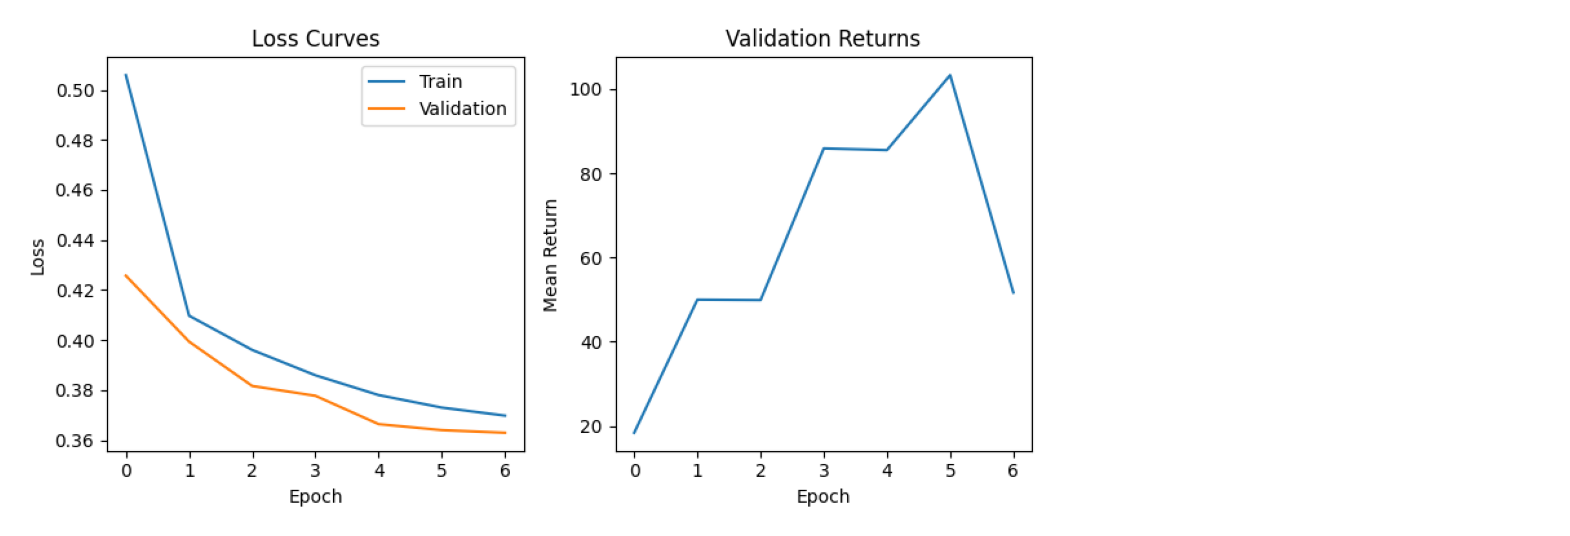

In [28]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(20, 10))
img = mpimg.imread('/content/models/memory_dt_velocity_cartpole_None_training.png')  # Замените на путь к файлу
plt.imshow(img)
plt.axis('off')  # Отключаем оси
plt.show()


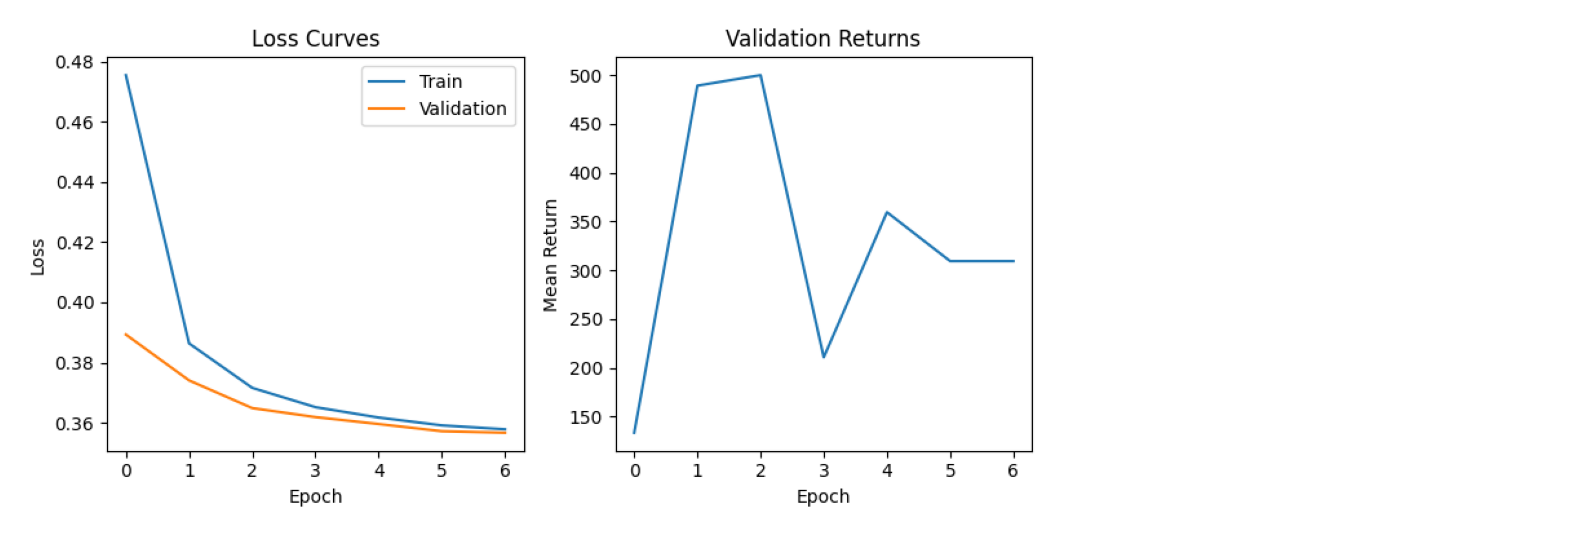

In [29]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(20, 10))
img = mpimg.imread('/content/models/memory_dt_velocity_cartpole_gru_training.png')  # Замените на путь к файлу
plt.imshow(img)
plt.axis('off')  # Отключаем оси
plt.show()


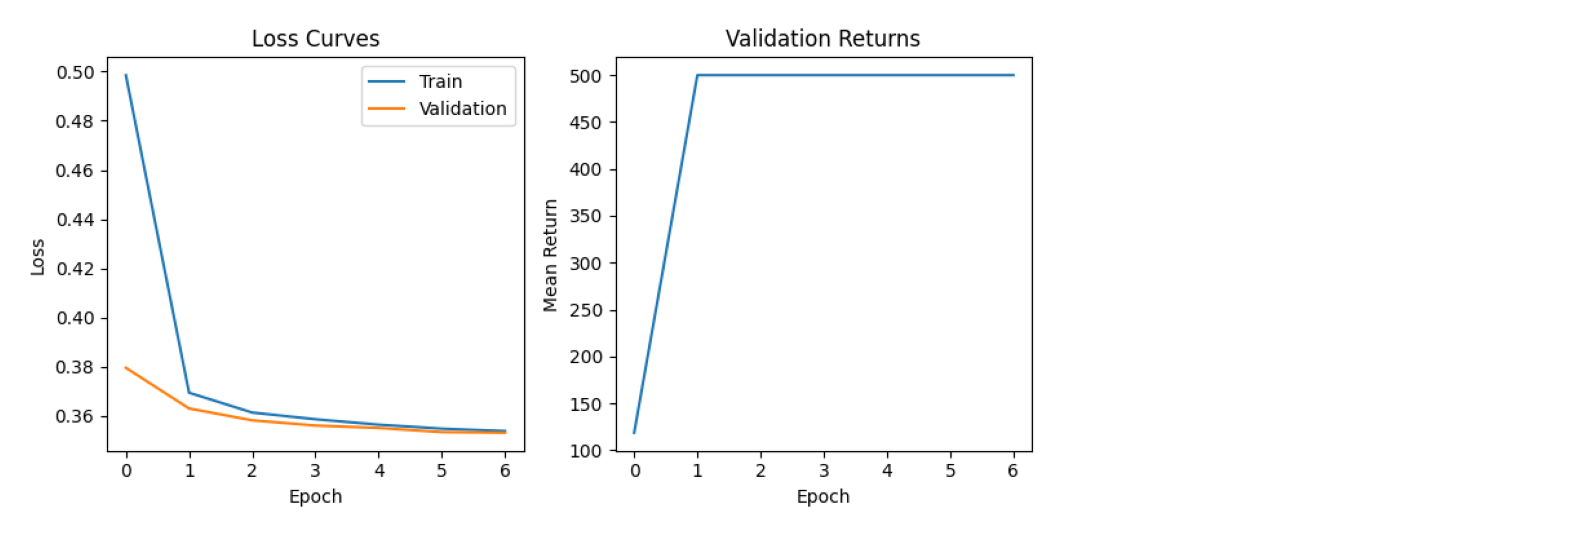

In [30]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(20, 10))
img = mpimg.imread('/content/models/memory_dt_velocity_cartpole_lstm_training.png')  # Замените на путь к файлу
plt.imshow(img)
plt.axis('off')  # Отключаем оси
plt.show()


In [31]:
!python /content/train_and_collect_data.py --env velocity_cartpole --train_timesteps 300000 --num_trajectories 100 --reward_threshold 100
!python utils/visualize_ppo_agent.py --env velocity_cartpole --model_path pomdp_datasets/velocity_cartpole/recurrent_ppo_velocity_cartpole.pt --rnn_type gru
!python memory_dt.py --dataset pomdp_datasets/velocity_cartpole --stats_only

Выходные данные были обрезаны до нескольких последних строк (5000).
Episode 1038, reward: 89.00, avg_reward (last 50): 121.38, timesteps: 50137/300000
Episode 1039, reward: 121.00, avg_reward (last 50): 117.58, timesteps: 50258/300000
Episode 1040, reward: 125.00, avg_reward (last 50): 117.96, timesteps: 50383/300000
Episode 1041, reward: 102.00, avg_reward (last 50): 117.12, timesteps: 50485/300000
Episode 1042, reward: 64.00, avg_reward (last 50): 112.58, timesteps: 50549/300000
Episode 1043, reward: 51.00, avg_reward (last 50): 106.76, timesteps: 50600/300000
Episode 1044, reward: 35.00, avg_reward (last 50): 103.16, timesteps: 50635/300000
Episode 1045, reward: 15.00, avg_reward (last 50): 99.64, timesteps: 50650/300000
Episode 1046, reward: 45.00, avg_reward (last 50): 94.90, timesteps: 50695/300000
Episode 1047, reward: 14.00, avg_reward (last 50): 92.62, timesteps: 50709/300000
Episode 1048, reward: 16.00, avg_reward (last 50): 90.28, timesteps: 50725/300000
Episode 1049, reward

In [32]:
# Train basic DT
!python run_memory_dt.py --env velocity_cartpole --memory_type none --n_epochs 7 --eval_episodes 20

# Validate basic DT
#!python utils/visualize_dt_agent.py --env velocity_cartpole --model_path models/memory_dt_velocity_cartpole_None2_best.pt --memory_type none


!python run_memory_dt.py --env velocity_cartpole --memory_type gru --n_epochs 7 --eval_episodes 20

#!python utils/visualize_dt_agent.py --env velocity_cartpole --model_path models/memory_dt_velocity_cartpole_gru2_best.pt --memory_type gru


!python run_memory_dt.py --env velocity_cartpole --memory_type lstm --n_epochs 7 --eval_episodes 20

#!python utils/visualize_dt_agent.py --env velocity_cartpole --model_path models/memory_dt_velocity_cartpole_lstm2_best.pt --memory_type lstm

Training Memory Decision Transformer on velocity_cartpole...
Dataset stats: total=43388, train=39049, val=4339, state_dim=2, actions=2
Epoch 1/7 [Train]: 100% 611/611 [02:29<00:00,  4.10it/s, loss=0.3759, avg_loss=0.4428, lr=0.000994]
Epoch 1/7: Train Loss=0.4428, Val Loss=0.3673
Running environment validation...
Episode 1: Return=220.0, Steps=220
Episode 2: Return=158.0, Steps=158
Episode 3: Return=100.0, Steps=100
Episode 4: Return=214.0, Steps=214
Episode 5: Return=500.0, Steps=500
Episode 6: Return=229.0, Steps=229
Episode 7: Return=122.0, Steps=122
Episode 8: Return=108.0, Steps=108
Episode 9: Return=254.0, Steps=254
Episode 10: Return=245.0, Steps=245
Validation: Mean Return=215.00, Success Rate=10.00%
New best model with return 215.00
Epoch 2/7 [Train]: 100% 611/611 [02:42<00:00,  3.77it/s, loss=0.3256, avg_loss=0.3687, lr=0.000898]
Epoch 2/7: Train Loss=0.3687, Val Loss=0.3603
Running environment validation...
Episode 1: Return=15.0, Steps=15
Episode 2: Return=117.0, Steps=117


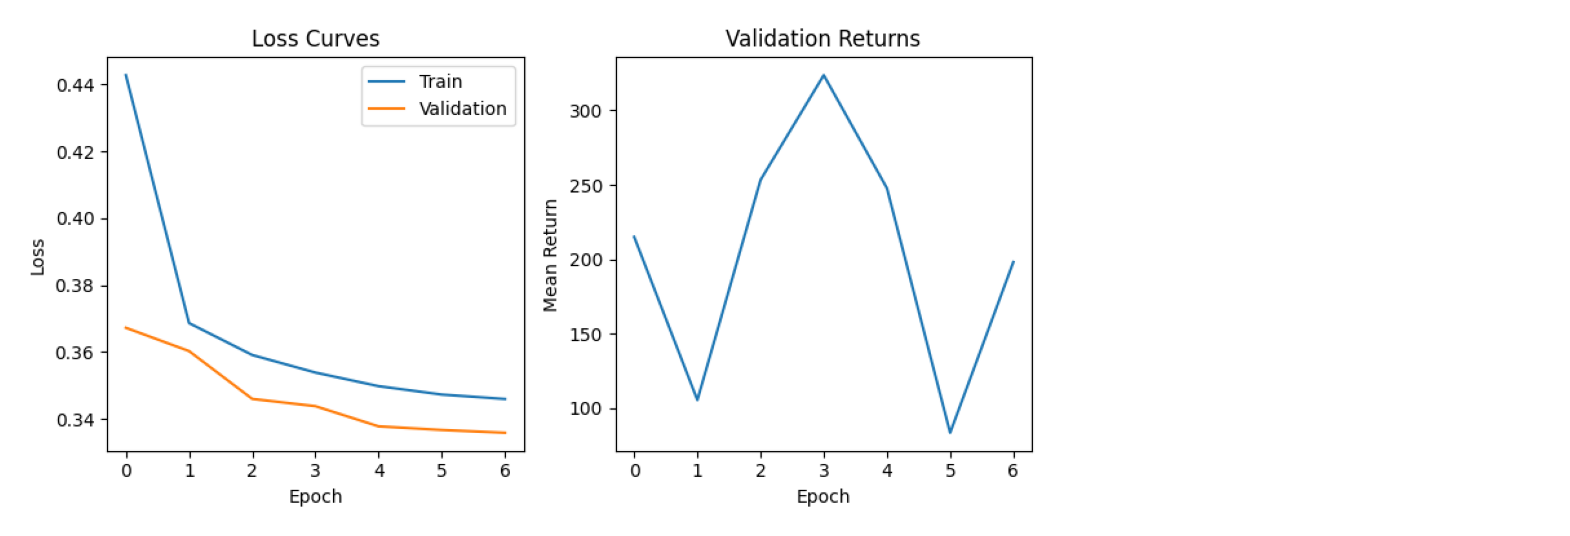

In [33]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(20, 10))
img = mpimg.imread('/content/models/memory_dt_velocity_cartpole_None_training.png')  # Замените на путь к файлу
plt.imshow(img)
plt.axis('off')  # Отключаем оси
plt.show()


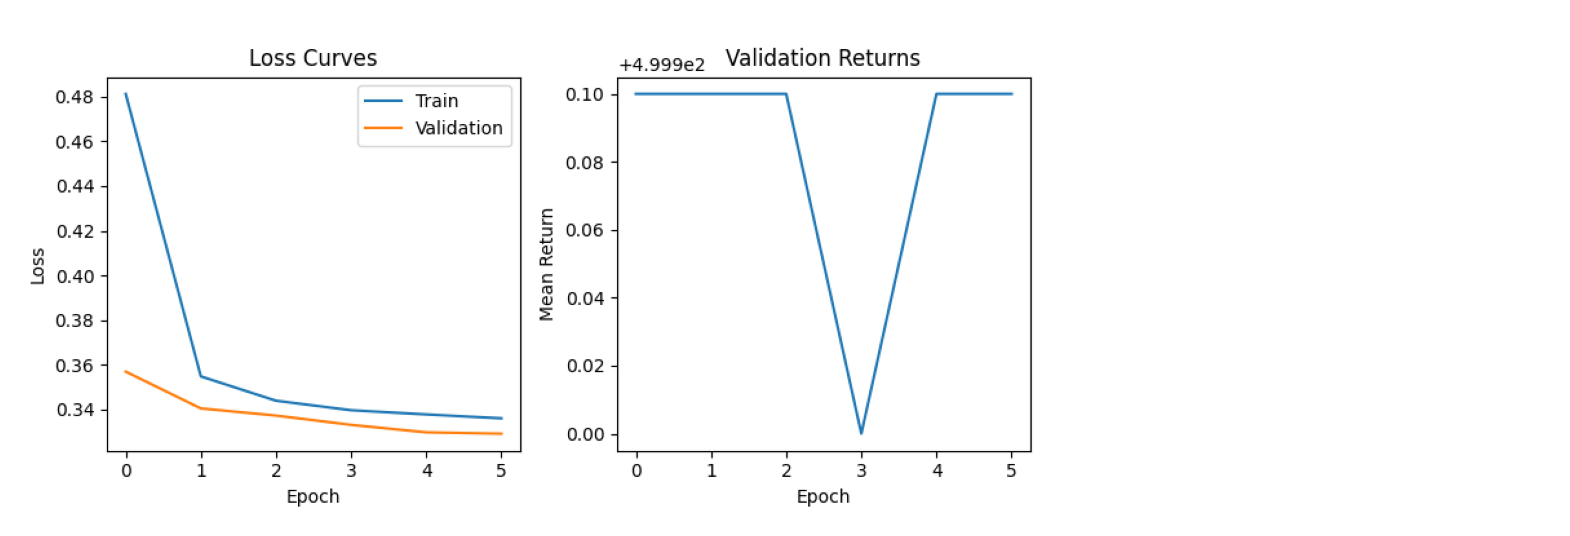

In [34]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(20, 10))
img = mpimg.imread('/content/models/memory_dt_velocity_cartpole_gru_training.png')  # Замените на путь к файлу
plt.imshow(img)
plt.axis('off')  # Отключаем оси
plt.show()


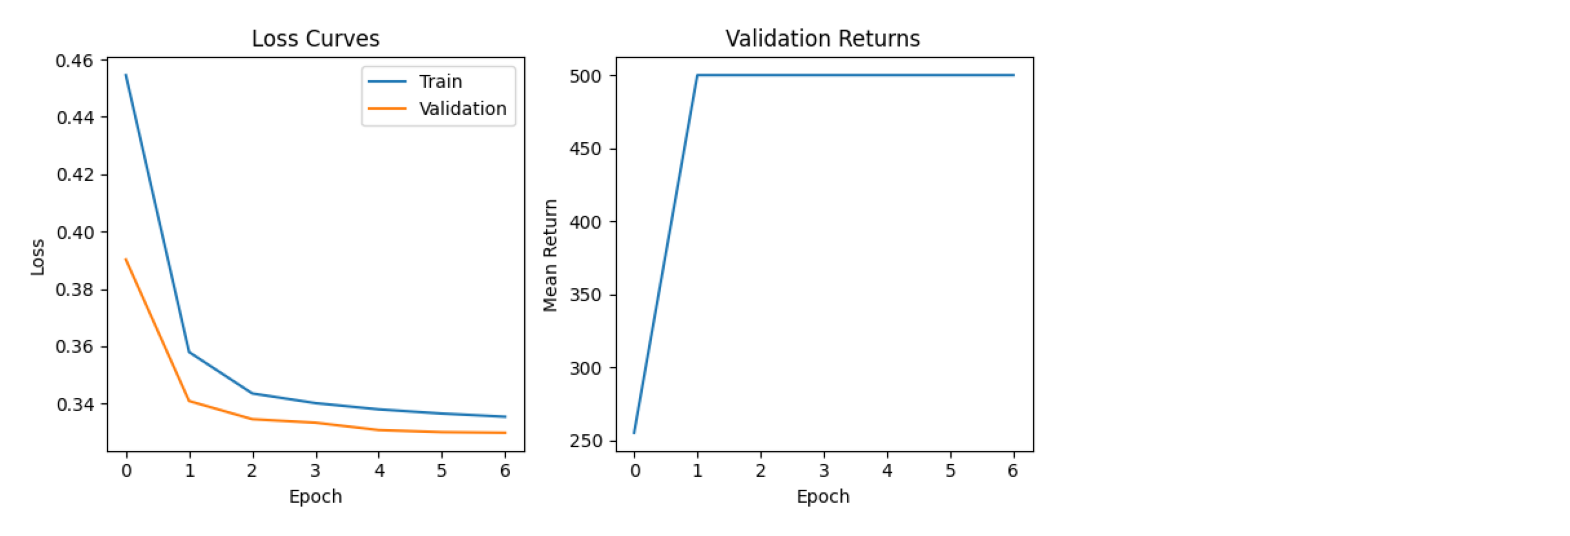

In [35]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(20, 10))
img = mpimg.imread('/content/models/memory_dt_velocity_cartpole_lstm_training.png')  # Замените на путь к файлу
plt.imshow(img)
plt.axis('off')  # Отключаем оси
plt.show()


В целом, понижение порога улучшает качество модели

# Timestamps

In [36]:
!python /content/train_and_collect_data.py --env velocity_cartpole --train_timesteps 200000 --num_trajectories 100 --reward_threshold 500
!python utils/visualize_ppo_agent.py --env velocity_cartpole --model_path pomdp_datasets/velocity_cartpole/recurrent_ppo_velocity_cartpole.pt --rnn_type gru
!python memory_dt.py --dataset pomdp_datasets/velocity_cartpole --stats_only

Using optimized parameters for velocity_cartpole
Training recurrent PPO agent ignoring existing checkpoint on velocity_cartpole for 300000 timesteps...
Episode 1, reward: 12.00, avg_reward (last 50): 12.00, timesteps: 12/300000
New best model saved with reward: 12.0
Episode 2, reward: 15.00, avg_reward (last 50): 13.50, timesteps: 27/300000
New best model saved with reward: 15.0
Episode 3, reward: 32.00, avg_reward (last 50): 19.67, timesteps: 59/300000
New best model saved with reward: 32.0
Episode 4, reward: 16.00, avg_reward (last 50): 18.75, timesteps: 75/300000
Episode 5, reward: 16.00, avg_reward (last 50): 18.20, timesteps: 91/300000
Episode 6, reward: 15.00, avg_reward (last 50): 17.67, timesteps: 106/300000
Episode 7, reward: 13.00, avg_reward (last 50): 17.00, timesteps: 119/300000
Episode 8, reward: 33.00, avg_reward (last 50): 19.00, timesteps: 152/300000
New best model saved with reward: 33.0
Episode 9, reward: 34.00, avg_reward (last 50): 20.67, timesteps: 186/300000
New 

In [37]:
# Train basic DT
!python run_memory_dt.py --env velocity_cartpole --memory_type none --n_epochs 7 --eval_episodes 20

# Validate basic DT
#!python utils/visualize_dt_agent.py --env velocity_cartpole --model_path models/memory_dt_velocity_cartpole_None2_best.pt --memory_type none


!python run_memory_dt.py --env velocity_cartpole --memory_type gru --n_epochs 7 --eval_episodes 20

#!python utils/visualize_dt_agent.py --env velocity_cartpole --model_path models/memory_dt_velocity_cartpole_gru2_best.pt --memory_type gru


!python run_memory_dt.py --env velocity_cartpole --memory_type lstm --n_epochs 7 --eval_episodes 20

#!python utils/visualize_dt_agent.py --env velocity_cartpole --model_path models/memory_dt_velocity_cartpole_lstm2_best.pt --memory_type lstm

Training Memory Decision Transformer on velocity_cartpole...
Dataset stats: total=45300, train=40770, val=4530, state_dim=2, actions=2
Epoch 1/7 [Train]: 100% 638/638 [02:18<00:00,  4.62it/s, loss=0.3934, avg_loss=0.5275, lr=0.000994]
Epoch 1/7: Train Loss=0.5275, Val Loss=0.4517
Running environment validation...
Episode 1: Return=9.0, Steps=9
Episode 2: Return=9.0, Steps=9
Episode 3: Return=12.0, Steps=12
Episode 4: Return=11.0, Steps=11
Episode 5: Return=8.0, Steps=8
Episode 6: Return=11.0, Steps=11
Episode 7: Return=8.0, Steps=8
Episode 8: Return=9.0, Steps=9
Episode 9: Return=11.0, Steps=11
Episode 10: Return=8.0, Steps=8
Validation: Mean Return=9.60, Success Rate=0.00%
New best model with return 9.60
Epoch 2/7 [Train]: 100% 638/638 [02:17<00:00,  4.65it/s, loss=0.5216, avg_loss=0.4541, lr=0.000898]
Epoch 2/7: Train Loss=0.4541, Val Loss=0.4463
Running environment validation...
Episode 1: Return=10.0, Steps=10
Episode 2: Return=9.0, Steps=9
Episode 3: Return=10.0, Steps=10
Episode 

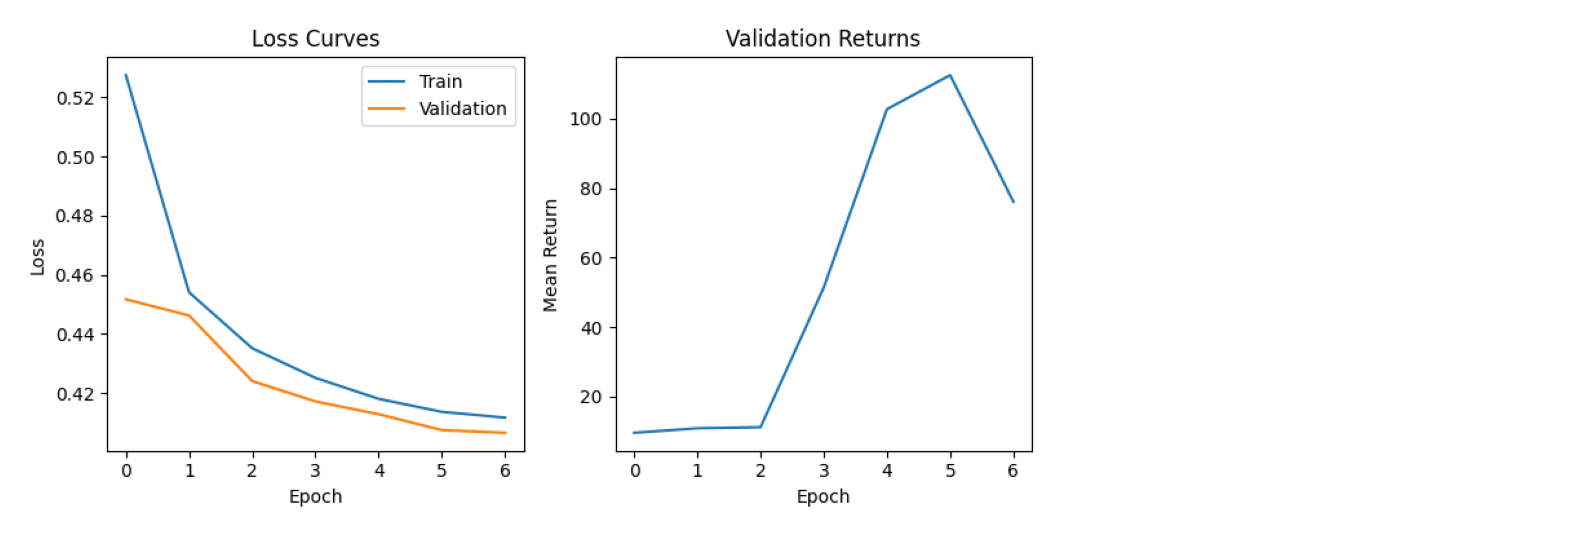

In [38]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(20, 10))
img = mpimg.imread('/content/models/memory_dt_velocity_cartpole_None_training.png')  # Замените на путь к файлу
plt.imshow(img)
plt.axis('off')  # Отключаем оси
plt.show()


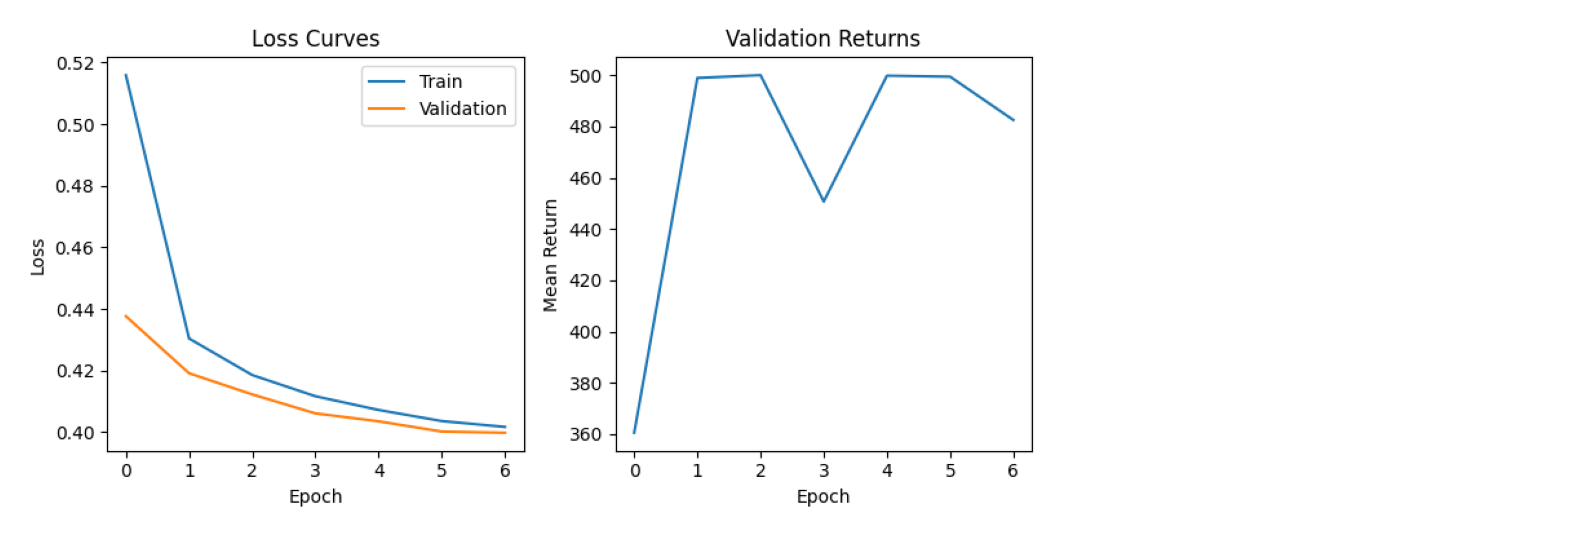

In [39]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(20, 10))
img = mpimg.imread('/content/models/memory_dt_velocity_cartpole_gru_training.png')  # Замените на путь к файлу
plt.imshow(img)
plt.axis('off')  # Отключаем оси
plt.show()


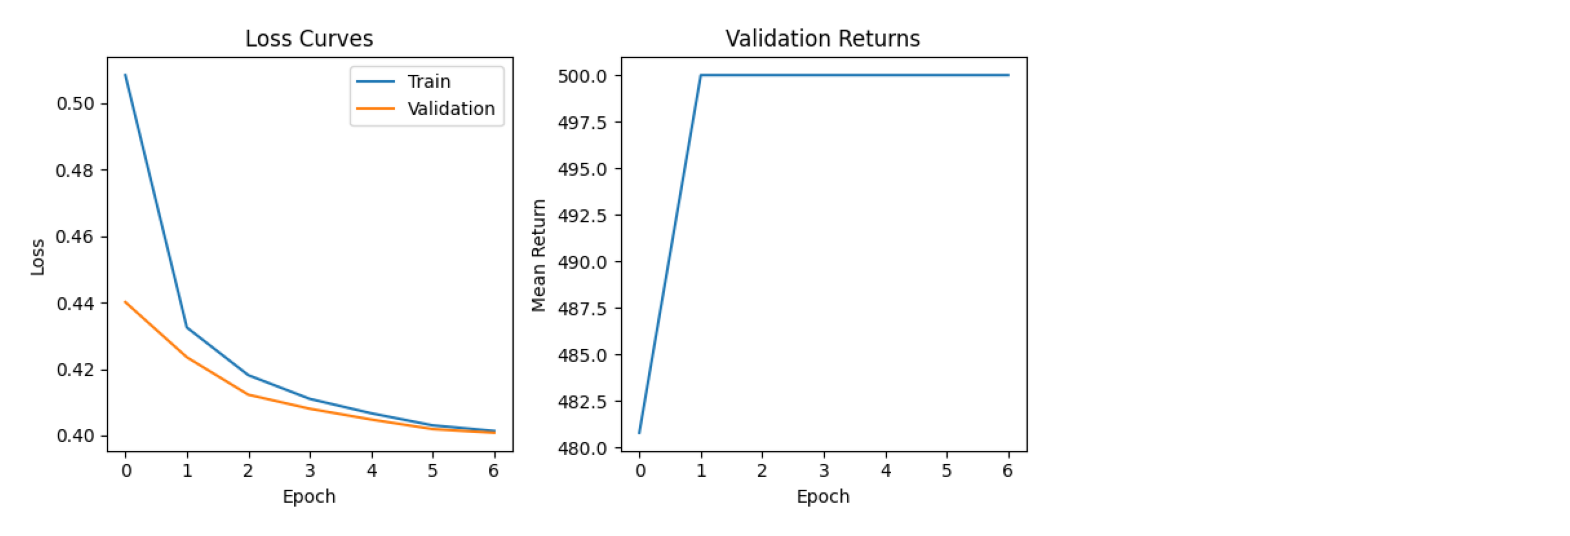

In [40]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(20, 10))
img = mpimg.imread('/content/models/memory_dt_velocity_cartpole_lstm_training.png')  # Замените на путь к файлу
plt.imshow(img)
plt.axis('off')  # Отключаем оси
plt.show()


In [2]:
!python /content/train_and_collect_data.py --env velocity_cartpole --train_timesteps 100000 --num_trajectories 100 --reward_threshold 500
!python utils/visualize_ppo_agent.py --env velocity_cartpole --model_path pomdp_datasets/velocity_cartpole/recurrent_ppo_velocity_cartpole.pt --rnn_type gru
!python memory_dt.py --dataset pomdp_datasets/velocity_cartpole --stats_only

Using optimized parameters for velocity_cartpole
Training recurrent PPO agent from scratch on velocity_cartpole for 300000 timesteps...
Episode 1, reward: 26.00, avg_reward (last 50): 26.00, timesteps: 26/300000
New best model saved with reward: 26.0
Episode 2, reward: 34.00, avg_reward (last 50): 30.00, timesteps: 60/300000
New best model saved with reward: 34.0
Episode 3, reward: 16.00, avg_reward (last 50): 25.33, timesteps: 76/300000
Episode 4, reward: 15.00, avg_reward (last 50): 22.75, timesteps: 91/300000
Episode 5, reward: 26.00, avg_reward (last 50): 23.40, timesteps: 117/300000
Episode 6, reward: 17.00, avg_reward (last 50): 22.33, timesteps: 134/300000
Episode 7, reward: 44.00, avg_reward (last 50): 25.43, timesteps: 178/300000
New best model saved with reward: 44.0
Episode 8, reward: 16.00, avg_reward (last 50): 24.25, timesteps: 194/300000
Episode 9, reward: 9.00, avg_reward (last 50): 22.56, timesteps: 203/300000
Episode 10, reward: 28.00, avg_reward (last 50): 23.10, tim

In [5]:
# Train basic DT
!python run_memory_dt.py --env velocity_cartpole --memory_type none --n_epochs 7 --eval_episodes 20

# Validate basic DT
#!python utils/visualize_dt_agent.py --env velocity_cartpole --model_path models/memory_dt_velocity_cartpole_None2_best.pt --memory_type none


!python run_memory_dt.py --env velocity_cartpole --memory_type gru --n_epochs 7 --eval_episodes 20

#!python utils/visualize_dt_agent.py --env velocity_cartpole --model_path models/memory_dt_velocity_cartpole_gru2_best.pt --memory_type gru


!python run_memory_dt.py --env velocity_cartpole --memory_type lstm --n_epochs 7 --eval_episodes 20

#!python utils/visualize_dt_agent.py --env velocity_cartpole --model_path models/memory_dt_velocity_cartpole_lstm2_best.pt --memory_type lstm

Training Memory Decision Transformer on velocity_cartpole...
Dataset stats: total=15940, train=14346, val=1594, state_dim=2, actions=2
Epoch 1/7 [Train]: 100% 225/225 [00:03<00:00, 62.76it/s, loss=0.5633, avg_loss=0.6566, lr=0.000994]
Epoch 1/7: Train Loss=0.6566, Val Loss=0.5245
Running environment validation...
Episode 1: Return=20.0, Steps=20
Episode 2: Return=20.0, Steps=20
Episode 3: Return=18.0, Steps=18
Episode 4: Return=17.0, Steps=17
Episode 5: Return=17.0, Steps=17
Episode 6: Return=20.0, Steps=20
Episode 7: Return=20.0, Steps=20
Episode 8: Return=20.0, Steps=20
Episode 9: Return=18.0, Steps=18
Episode 10: Return=17.0, Steps=17
Validation: Mean Return=18.70, Success Rate=0.00%
New best model with return 18.70
Epoch 2/7 [Train]: 100% 225/225 [00:03<00:00, 63.39it/s, loss=0.5475, avg_loss=0.5372, lr=0.000898]
Epoch 2/7: Train Loss=0.5372, Val Loss=0.5254
Running environment validation...
Episode 1: Return=25.0, Steps=25
Episode 2: Return=26.0, Steps=26
Episode 3: Return=26.0, S

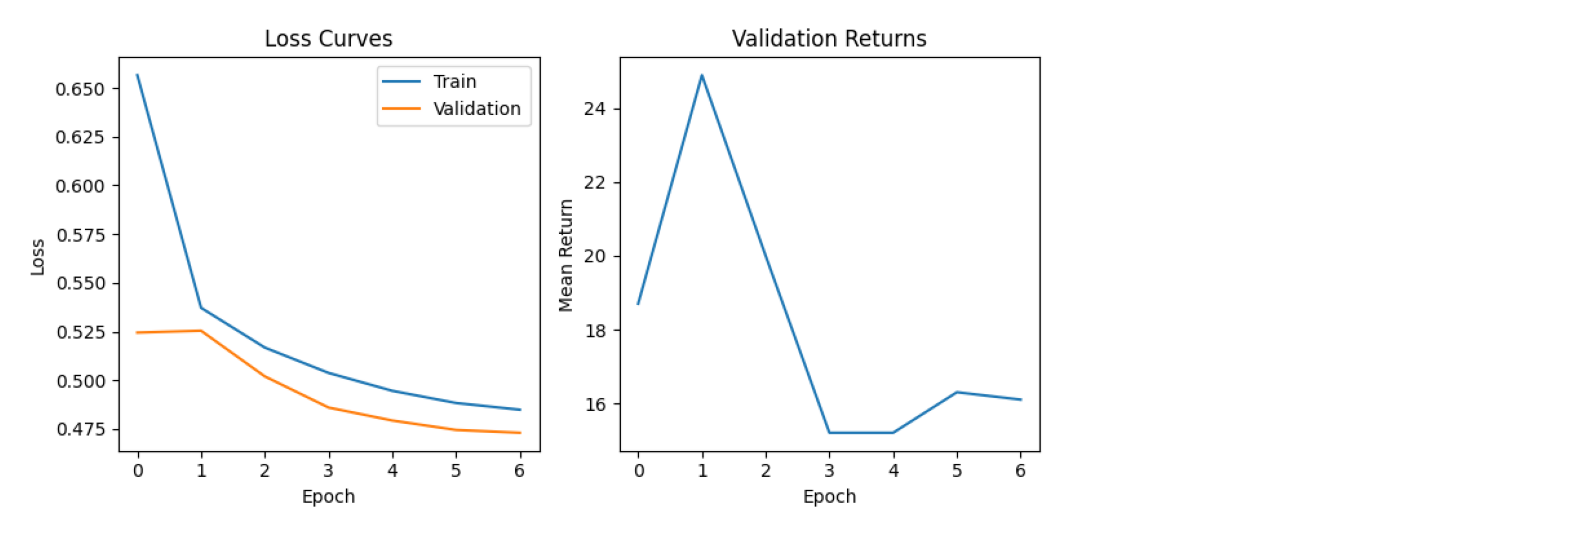

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(20, 10))
img = mpimg.imread('/content/models/memory_dt_velocity_cartpole_None_training.png')  # Замените на путь к файлу
plt.imshow(img)
plt.axis('off')  # Отключаем оси
plt.show()


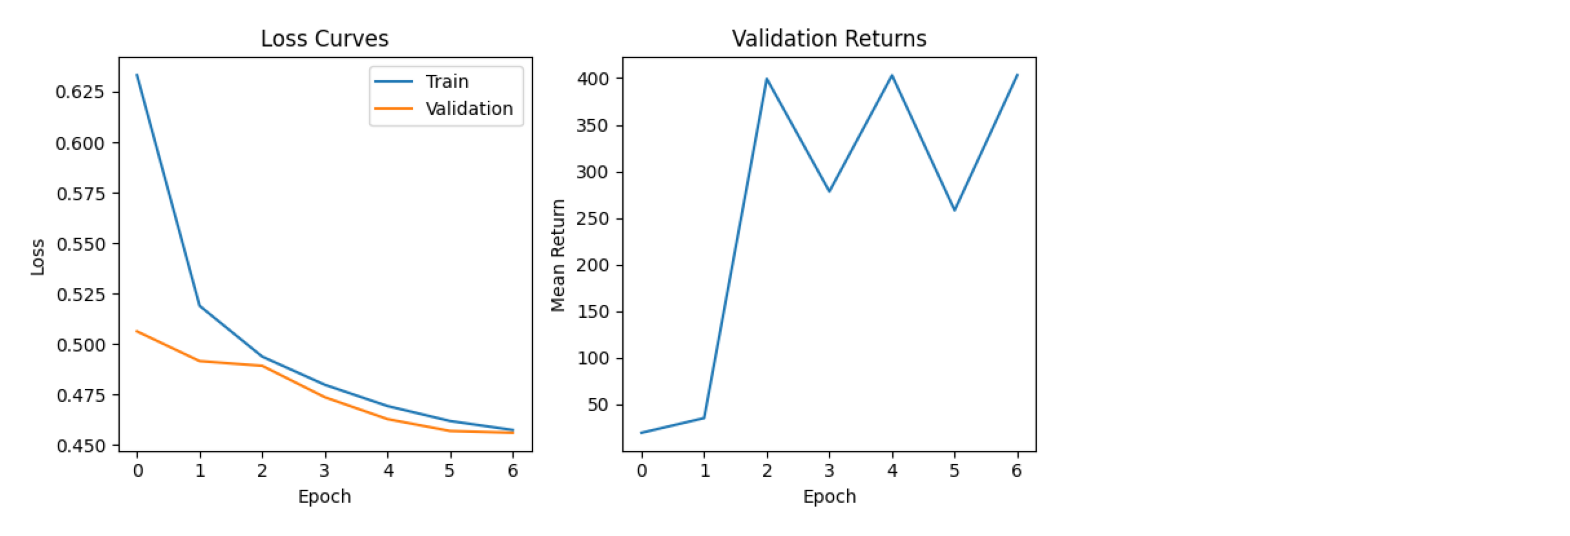

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(20, 10))
img = mpimg.imread('/content/models/memory_dt_velocity_cartpole_gru_training.png')  # Замените на путь к файлу
plt.imshow(img)
plt.axis('off')  # Отключаем оси
plt.show()


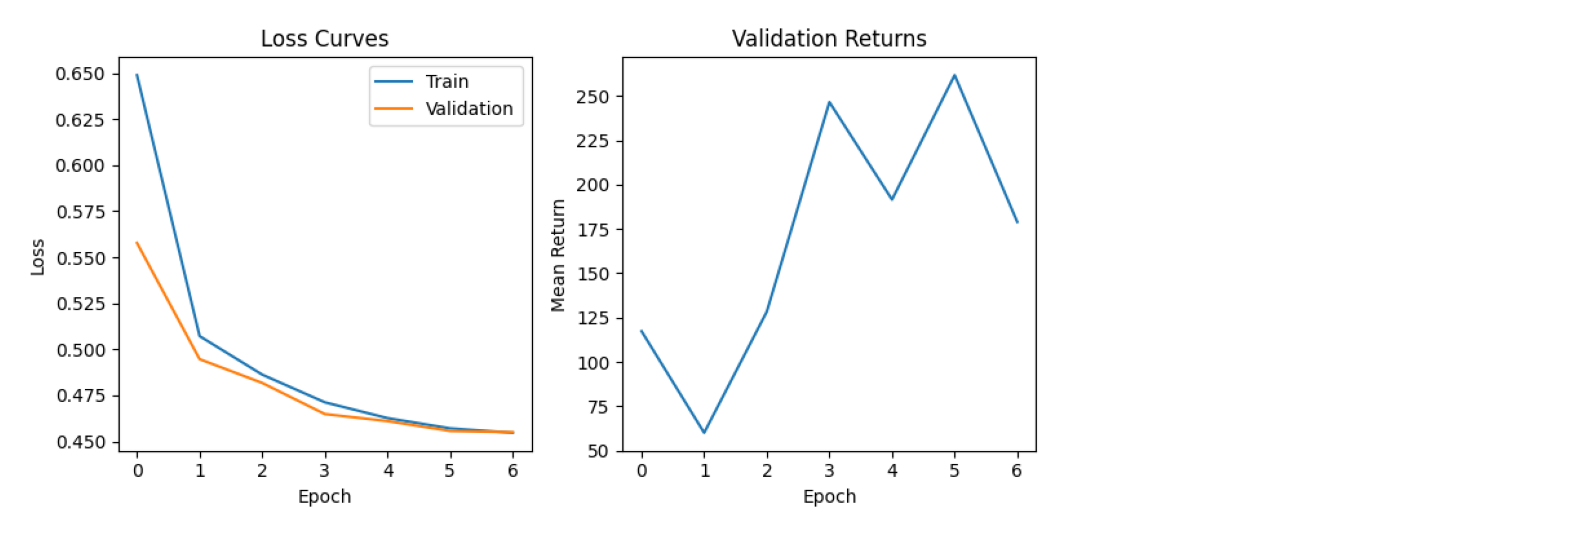

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(20, 10))
img = mpimg.imread('/content/models/memory_dt_velocity_cartpole_lstm_training.png')  # Замените на путь к файлу
plt.imshow(img)
plt.axis('off')  # Отключаем оси
plt.show()


# num trajectories

In [9]:
!python /content/train_and_collect_data.py --env velocity_cartpole --train_timesteps 300000 --num_trajectories 200 --reward_threshold 500
!python utils/visualize_ppo_agent.py --env velocity_cartpole --model_path pomdp_datasets/velocity_cartpole/recurrent_ppo_velocity_cartpole.pt --rnn_type gru
!python memory_dt.py --dataset pomdp_datasets/velocity_cartpole --stats_only

Выходные данные были обрезаны до нескольких последних строк (5000).
Episode 922, reward: 10.00, avg_reward (last 50): 24.42, timesteps: 18951/300000
Episode 923, reward: 15.00, avg_reward (last 50): 24.14, timesteps: 18966/300000
Episode 924, reward: 12.00, avg_reward (last 50): 23.10, timesteps: 18978/300000
Episode 925, reward: 52.00, avg_reward (last 50): 23.90, timesteps: 19030/300000
Episode 926, reward: 43.00, avg_reward (last 50): 24.30, timesteps: 19073/300000
Episode 927, reward: 11.00, avg_reward (last 50): 24.20, timesteps: 19084/300000
Episode 928, reward: 17.00, avg_reward (last 50): 24.30, timesteps: 19101/300000
Episode 929, reward: 20.00, avg_reward (last 50): 24.18, timesteps: 19121/300000
Episode 930, reward: 19.00, avg_reward (last 50): 24.24, timesteps: 19140/300000
Episode 931, reward: 22.00, avg_reward (last 50): 24.28, timesteps: 19162/300000
Episode 932, reward: 22.00, avg_reward (last 50): 24.26, timesteps: 19184/300000
Episode 933, reward: 19.00, avg_reward (l

In [10]:
# Train basic DT
!python run_memory_dt.py --env velocity_cartpole --memory_type none --n_epochs 7 --eval_episodes 20

# Validate basic DT
#!python utils/visualize_dt_agent.py --env velocity_cartpole --model_path models/memory_dt_velocity_cartpole_None2_best.pt --memory_type none


!python run_memory_dt.py --env velocity_cartpole --memory_type gru --n_epochs 7 --eval_episodes 20

#!python utils/visualize_dt_agent.py --env velocity_cartpole --model_path models/memory_dt_velocity_cartpole_gru2_best.pt --memory_type gru


!python run_memory_dt.py --env velocity_cartpole --memory_type lstm --n_epochs 7 --eval_episodes 20

#!python utils/visualize_dt_agent.py --env velocity_cartpole --model_path models/memory_dt_velocity_cartpole_lstm2_best.pt --memory_type lstm

Training Memory Decision Transformer on velocity_cartpole...
Dataset stats: total=25940, train=23346, val=2594, state_dim=2, actions=2
Epoch 1/7 [Train]: 100% 365/365 [00:05<00:00, 64.81it/s, loss=0.5134, avg_loss=0.5926, lr=0.000994]
Epoch 1/7: Train Loss=0.5926, Val Loss=0.5068
Running environment validation...
Episode 1: Return=14.0, Steps=14
Episode 2: Return=123.0, Steps=123
Episode 3: Return=134.0, Steps=134
Episode 4: Return=80.0, Steps=80
Episode 5: Return=73.0, Steps=73
Episode 6: Return=13.0, Steps=13
Episode 7: Return=99.0, Steps=99
Episode 8: Return=51.0, Steps=51
Episode 9: Return=85.0, Steps=85
Episode 10: Return=95.0, Steps=95
Validation: Mean Return=76.70, Success Rate=0.00%
New best model with return 76.70
Epoch 2/7 [Train]: 100% 365/365 [00:04<00:00, 77.47it/s, loss=0.4857, avg_loss=0.4991, lr=0.000898]
Epoch 2/7: Train Loss=0.4991, Val Loss=0.4825
Running environment validation...
Episode 1: Return=345.0, Steps=345
Episode 2: Return=228.0, Steps=228
Episode 3: Return

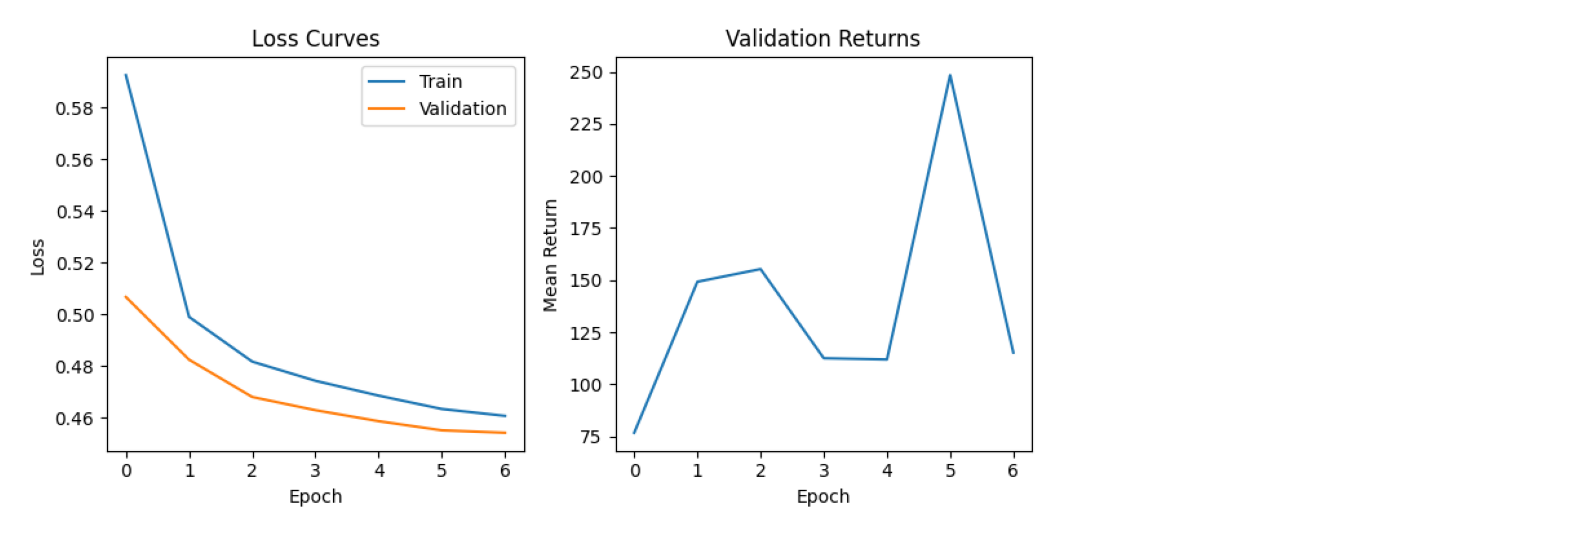

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(20, 10))
img = mpimg.imread('/content/models/memory_dt_velocity_cartpole_None_training.png')  # Замените на путь к файлу
plt.imshow(img)
plt.axis('off')  # Отключаем оси
plt.show()


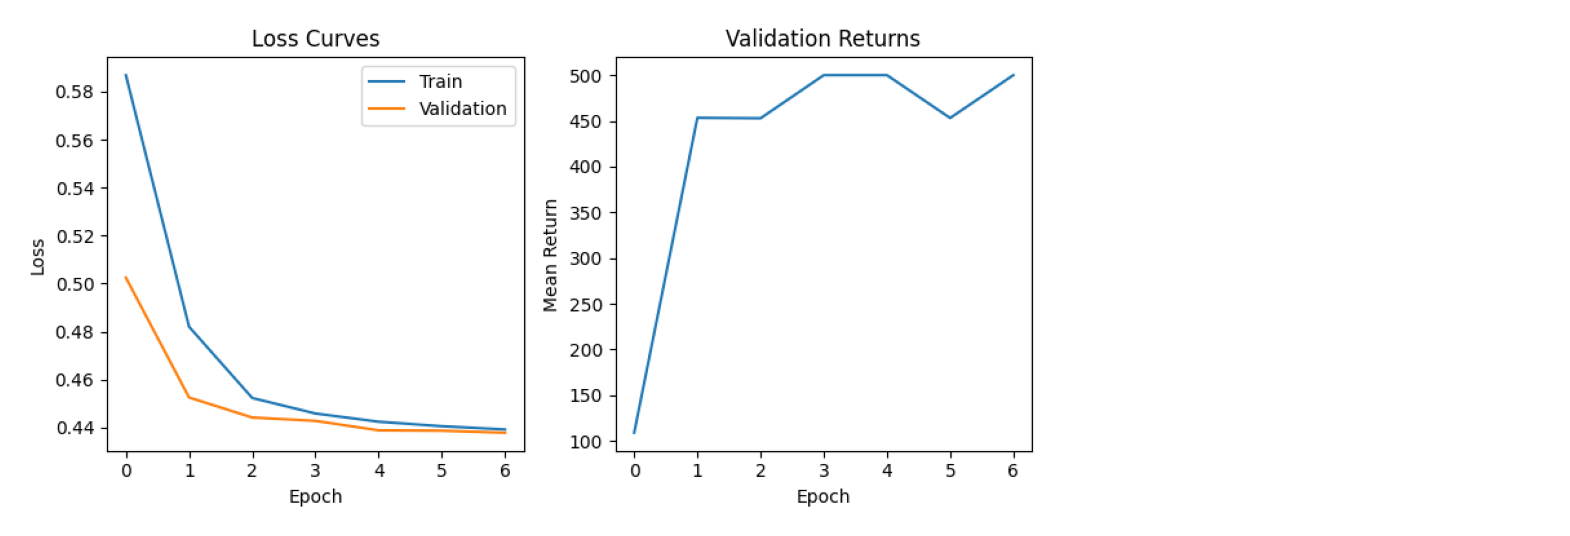

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(20, 10))
img = mpimg.imread('/content/models/memory_dt_velocity_cartpole_gru_training.png')  # Замените на путь к файлу
plt.imshow(img)
plt.axis('off')  # Отключаем оси
plt.show()


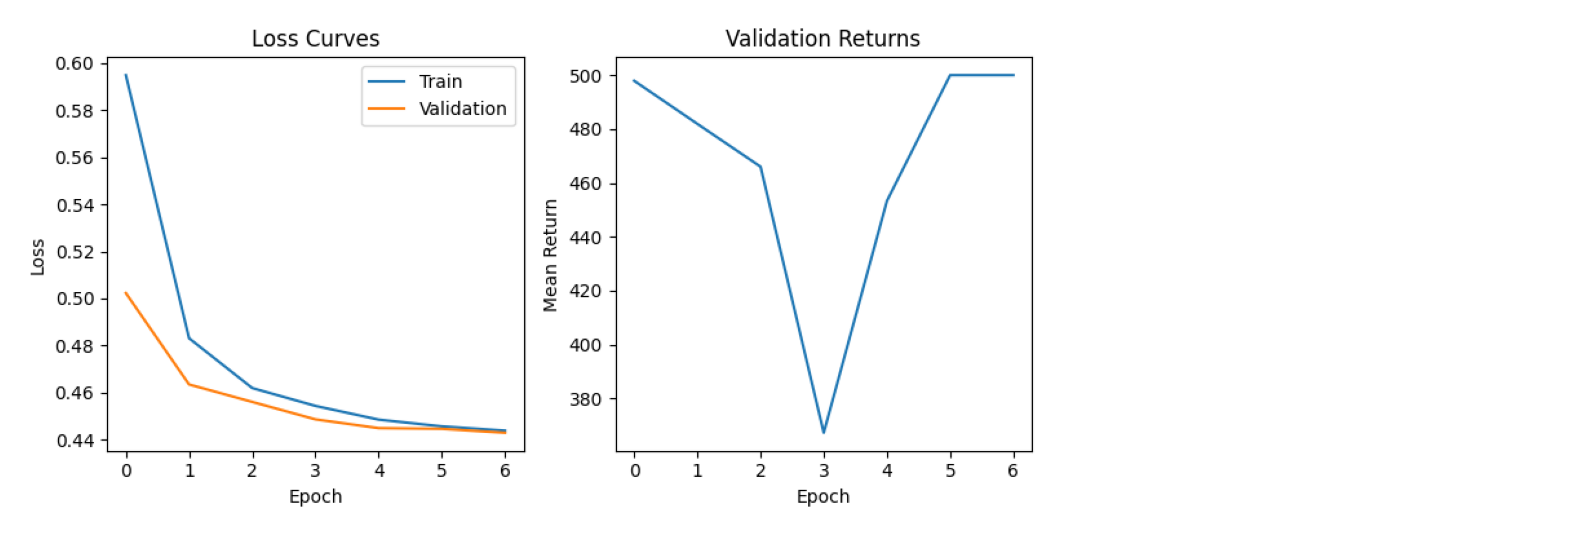

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(20, 10))
img = mpimg.imread('/content/models/memory_dt_velocity_cartpole_lstm_training.png')  # Замените на путь к файлу
plt.imshow(img)
plt.axis('off')  # Отключаем оси
plt.show()


In [14]:
!python /content/train_and_collect_data.py --env velocity_cartpole --train_timesteps 100000 --num_trajectories 50 --reward_threshold 500
!python utils/visualize_ppo_agent.py --env velocity_cartpole --model_path pomdp_datasets/velocity_cartpole/recurrent_ppo_velocity_cartpole.pt --rnn_type gru
!python memory_dt.py --dataset pomdp_datasets/velocity_cartpole --stats_only

Выходные данные были обрезаны до нескольких последних строк (5000).
Episode 610, reward: 54.00, avg_reward (last 50): 24.50, timesteps: 12309/300000
Episode 611, reward: 15.00, avg_reward (last 50): 24.64, timesteps: 12324/300000
Episode 612, reward: 40.00, avg_reward (last 50): 25.14, timesteps: 12364/300000
Episode 613, reward: 47.00, avg_reward (last 50): 25.10, timesteps: 12411/300000
Episode 614, reward: 16.00, avg_reward (last 50): 24.54, timesteps: 12427/300000
Episode 615, reward: 22.00, avg_reward (last 50): 24.52, timesteps: 12449/300000
Episode 616, reward: 16.00, avg_reward (last 50): 23.84, timesteps: 12465/300000
Episode 617, reward: 21.00, avg_reward (last 50): 23.94, timesteps: 12486/300000
Episode 618, reward: 12.00, avg_reward (last 50): 23.80, timesteps: 12498/300000
Episode 619, reward: 30.00, avg_reward (last 50): 24.20, timesteps: 12528/300000
Episode 620, reward: 15.00, avg_reward (last 50): 24.26, timesteps: 12543/300000
Episode 621, reward: 17.00, avg_reward (l

In [15]:
# Train basic DT
!python run_memory_dt.py --env velocity_cartpole --memory_type none --n_epochs 7 --eval_episodes 20

# Validate basic DT
#!python utils/visualize_dt_agent.py --env velocity_cartpole --model_path models/memory_dt_velocity_cartpole_None2_best.pt --memory_type none


!python run_memory_dt.py --env velocity_cartpole --memory_type gru --n_epochs 7 --eval_episodes 20

#!python utils/visualize_dt_agent.py --env velocity_cartpole --model_path models/memory_dt_velocity_cartpole_gru2_best.pt --memory_type gru


!python run_memory_dt.py --env velocity_cartpole --memory_type lstm --n_epochs 7 --eval_episodes 20

#!python utils/visualize_dt_agent.py --env velocity_cartpole --model_path models/memory_dt_velocity_cartpole_lstm2_best.pt --memory_type lstm

Training Memory Decision Transformer on velocity_cartpole...
Dataset stats: total=25940, train=23346, val=2594, state_dim=2, actions=2
Epoch 1/7 [Train]: 100% 365/365 [00:05<00:00, 69.25it/s, loss=0.5209, avg_loss=0.5700, lr=0.000994]
Epoch 1/7: Train Loss=0.5700, Val Loss=0.4933
Running environment validation...
Episode 1: Return=11.0, Steps=11
Episode 2: Return=12.0, Steps=12
Episode 3: Return=9.0, Steps=9
Episode 4: Return=12.0, Steps=12
Episode 5: Return=12.0, Steps=12
Episode 6: Return=9.0, Steps=9
Episode 7: Return=10.0, Steps=10
Episode 8: Return=9.0, Steps=9
Episode 9: Return=11.0, Steps=11
Episode 10: Return=11.0, Steps=11
Validation: Mean Return=10.60, Success Rate=0.00%
New best model with return 10.60
Epoch 2/7 [Train]: 100% 365/365 [00:05<00:00, 71.45it/s, loss=0.5046, avg_loss=0.4949, lr=0.000898]
Epoch 2/7: Train Loss=0.4949, Val Loss=0.4784
Running environment validation...
Episode 1: Return=38.0, Steps=38
Episode 2: Return=57.0, Steps=57
Episode 3: Return=14.0, Steps=1

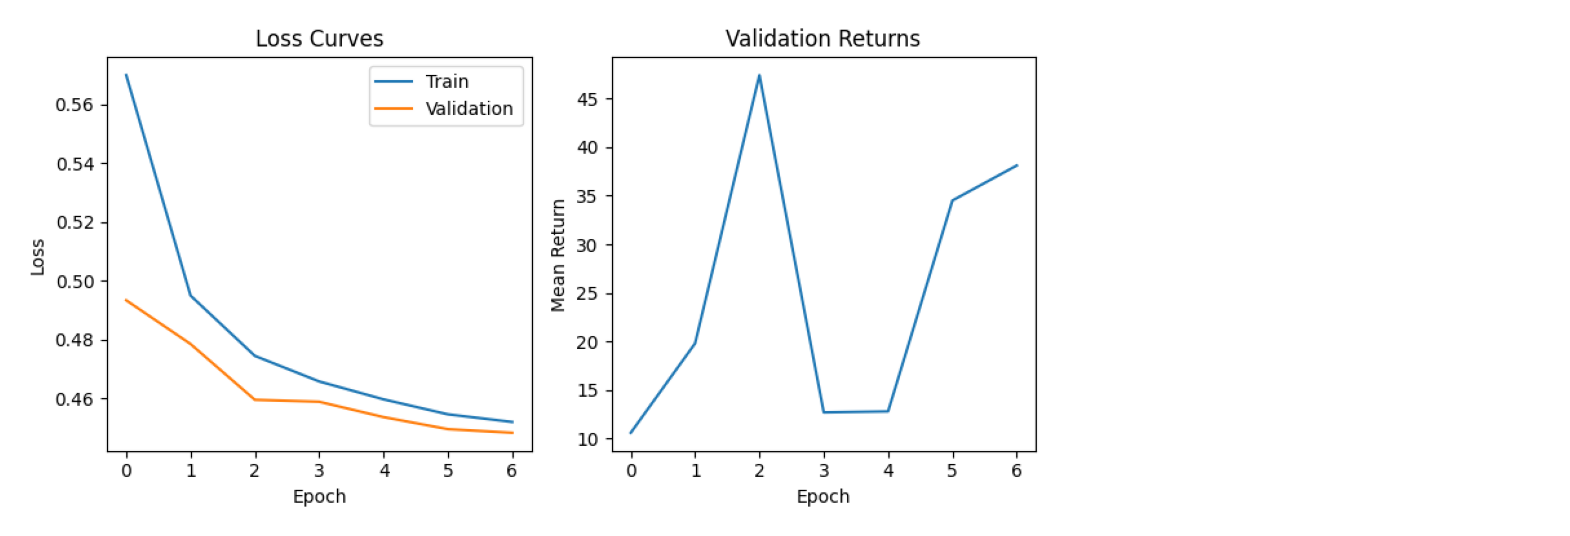

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(20, 10))
img = mpimg.imread('/content/models/memory_dt_velocity_cartpole_None_training.png')  # Замените на путь к файлу
plt.imshow(img)
plt.axis('off')  # Отключаем оси
plt.show()


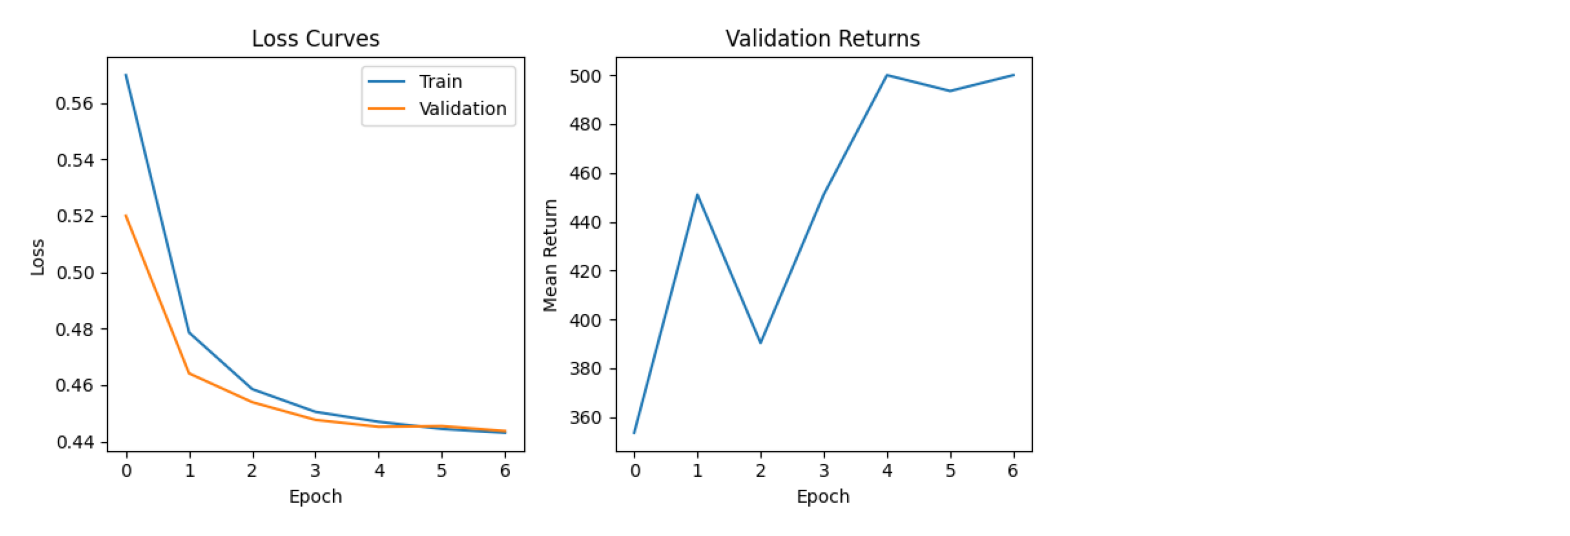

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(20, 10))
img = mpimg.imread('/content/models/memory_dt_velocity_cartpole_gru_training.png')  # Замените на путь к файлу
plt.imshow(img)
plt.axis('off')  # Отключаем оси
plt.show()


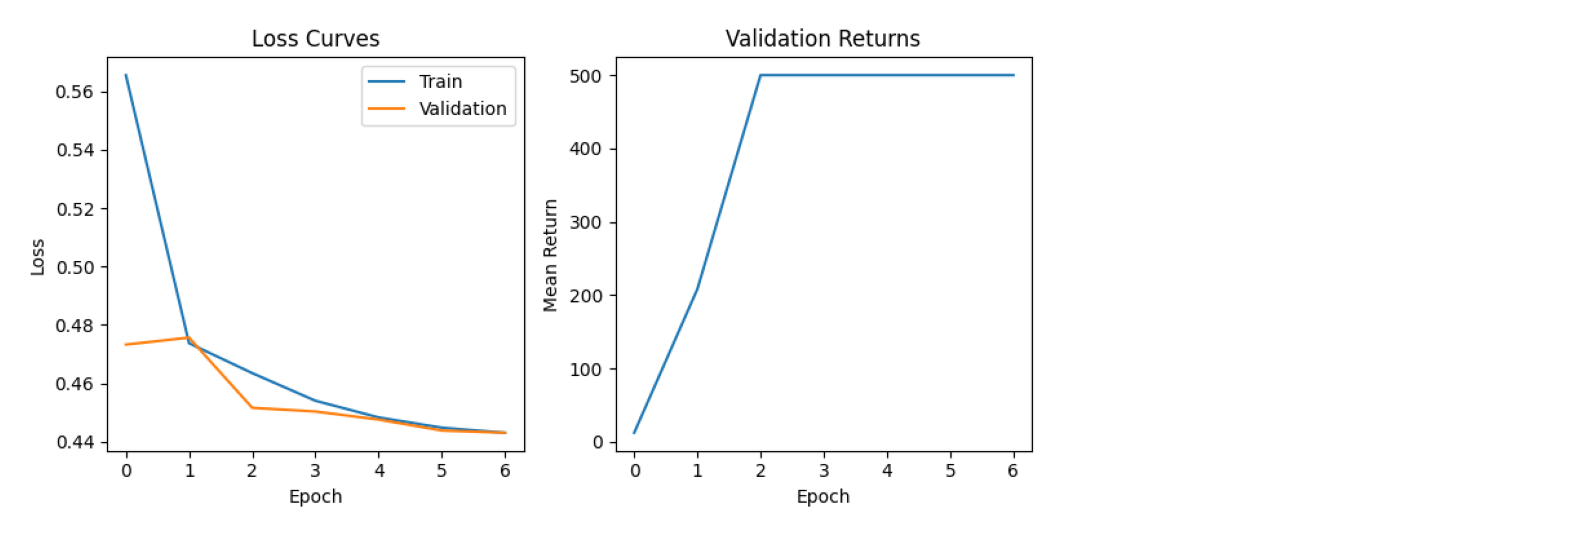

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(20, 10))
img = mpimg.imread('/content/models/memory_dt_velocity_cartpole_lstm_training.png')  # Замените на путь к файлу
plt.imshow(img)
plt.axis('off')  # Отключаем оси
plt.show()


Изменение числа траекторий хорошо сказалось только на GRU

# Context length

In [36]:
!python /content/train_and_collect_data.py --env velocity_cartpole --train_timesteps 300000 --num_trajectories 100 --reward_threshold 500
!python utils/visualize_ppo_agent.py --env velocity_cartpole --model_path pomdp_datasets/velocity_cartpole/recurrent_ppo_velocity_cartpole.pt --rnn_type gru
!python memory_dt.py --dataset pomdp_datasets/velocity_cartpole --stats_only

Выходные данные были обрезаны до нескольких последних строк (5000).
Episode 1266, reward: 14.00, avg_reward (last 50): 108.06, timesteps: 61569/300000
Episode 1267, reward: 57.00, avg_reward (last 50): 102.16, timesteps: 61626/300000
Episode 1268, reward: 140.00, avg_reward (last 50): 103.72, timesteps: 61766/300000
Episode 1269, reward: 500.00, avg_reward (last 50): 106.94, timesteps: 62266/300000
Episode 1270, reward: 114.00, avg_reward (last 50): 108.92, timesteps: 62380/300000
Episode 1271, reward: 500.00, avg_reward (last 50): 116.80, timesteps: 62880/300000
Episode 1272, reward: 169.00, avg_reward (last 50): 115.32, timesteps: 63049/300000
Episode 1273, reward: 166.00, avg_reward (last 50): 117.26, timesteps: 63215/300000
Episode 1274, reward: 379.00, avg_reward (last 50): 122.58, timesteps: 63594/300000
Episode 1275, reward: 112.00, avg_reward (last 50): 121.48, timesteps: 63706/300000
Update 500 - Loss: 19.9678, Actor Loss: 0.0019, Critic Loss: 39.9362, Entropy: 0.2172, KL: 0.0

In [37]:
!python run_memory_dt.py --env velocity_cartpole --memory_type attention --context_length 50 --n_epochs 7 --eval_episodes 20

Training Memory Decision Transformer on velocity_cartpole...
Dataset stats: total=49850, train=44865, val=4985, state_dim=2, actions=2
Epoch 1/7 [Train]: 100% 702/702 [00:15<00:00, 44.24it/s, loss=0.5413, avg_loss=0.4781, lr=0.000994]
Epoch 1/7: Train Loss=0.4781, Val Loss=0.4085
Running environment validation...
object address  : 0x7e939046bee0
object refcount : 2
object type     : 0x9d5ea0
object type name: KeyboardInterrupt
object repr     : KeyboardInterrupt()
lost sys.stderr


In [38]:
# Train basic DT
!python run_memory_dt.py --env velocity_cartpole --memory_type none --n_epochs 7 --eval_episodes 20 --context_length 50

# Validate basic DT
#!python utils/visualize_dt_agent.py --env velocity_cartpole --model_path models/memory_dt_velocity_cartpole_None2_best.pt --memory_type none


!python run_memory_dt.py --env velocity_cartpole --memory_type gru --n_epochs 7 --eval_episodes 20 --context_length 50

#!python utils/visualize_dt_agent.py --env velocity_cartpole --model_path models/memory_dt_velocity_cartpole_gru2_best.pt --memory_type gru


!python run_memory_dt.py --env velocity_cartpole --memory_type lstm --n_epochs 7 --eval_episodes 20 --context_length 50

#!python utils/visualize_dt_agent.py --env velocity_cartpole --model_path models/memory_dt_velocity_cartpole_lstm2_best.pt --memory_type lstm

Training Memory Decision Transformer on velocity_cartpole...
Dataset stats: total=49850, train=44865, val=4985, state_dim=2, actions=2
Epoch 1/7 [Train]: 100% 702/702 [00:13<00:00, 51.62it/s, loss=0.4998, avg_loss=0.4806, lr=0.000994]
Epoch 1/7: Train Loss=0.4806, Val Loss=0.4094
Running environment validation...
Episode 1: Return=12.0, Steps=12
Episode 2: Return=13.0, Steps=13
Episode 3: Return=13.0, Steps=13
Episode 4: Return=15.0, Steps=15
Episode 5: Return=17.0, Steps=17
Episode 6: Return=13.0, Steps=13
Episode 7: Return=13.0, Steps=13
Episode 8: Return=17.0, Steps=17
Episode 9: Return=11.0, Steps=11
Episode 10: Return=17.0, Steps=17
Validation: Mean Return=14.10, Success Rate=0.00%
New best model with return 14.10
Epoch 2/7 [Train]: 100% 702/702 [00:12<00:00, 55.13it/s, loss=0.4600, avg_loss=0.3908, lr=0.000898]
Epoch 2/7: Train Loss=0.3908, Val Loss=0.3788
Running environment validation...
Episode 1: Return=20.0, Steps=20
Episode 2: Return=19.0, Steps=19
Episode 3: Return=13.0, S

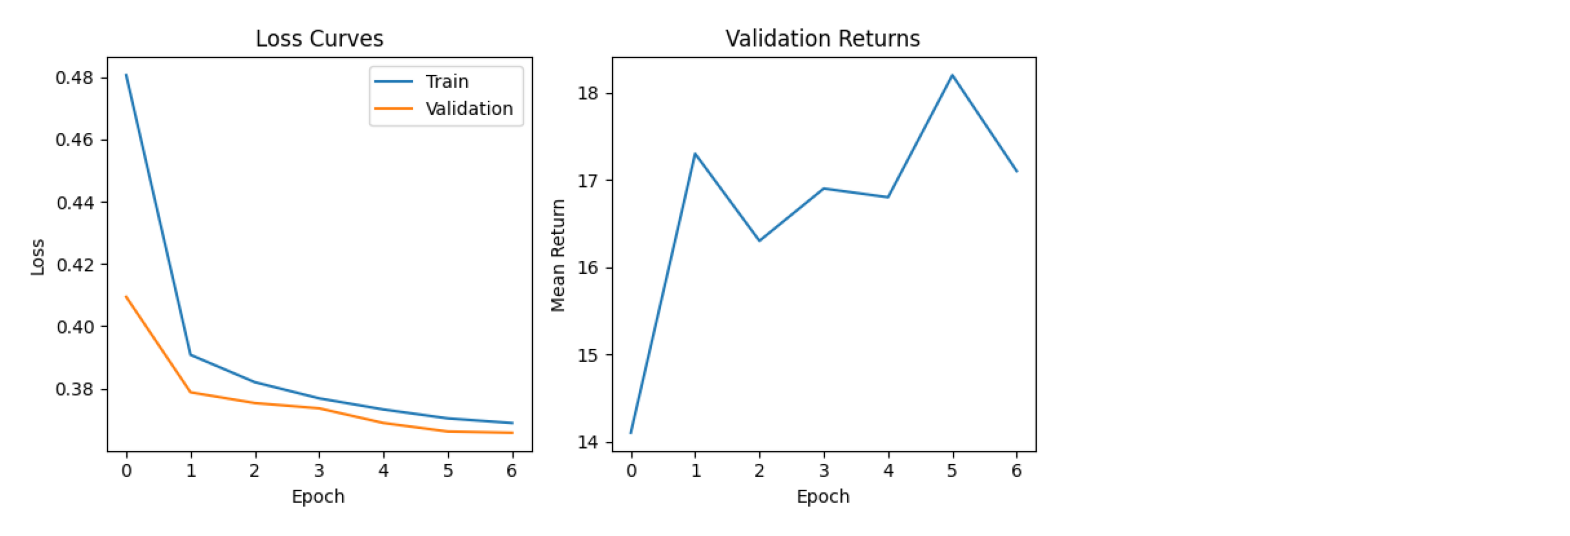

In [39]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(20, 10))
img = mpimg.imread('/content/models/memory_dt_velocity_cartpole_None_training.png')  # Замените на путь к файлу
plt.imshow(img)
plt.axis('off')  # Отключаем оси
plt.show()


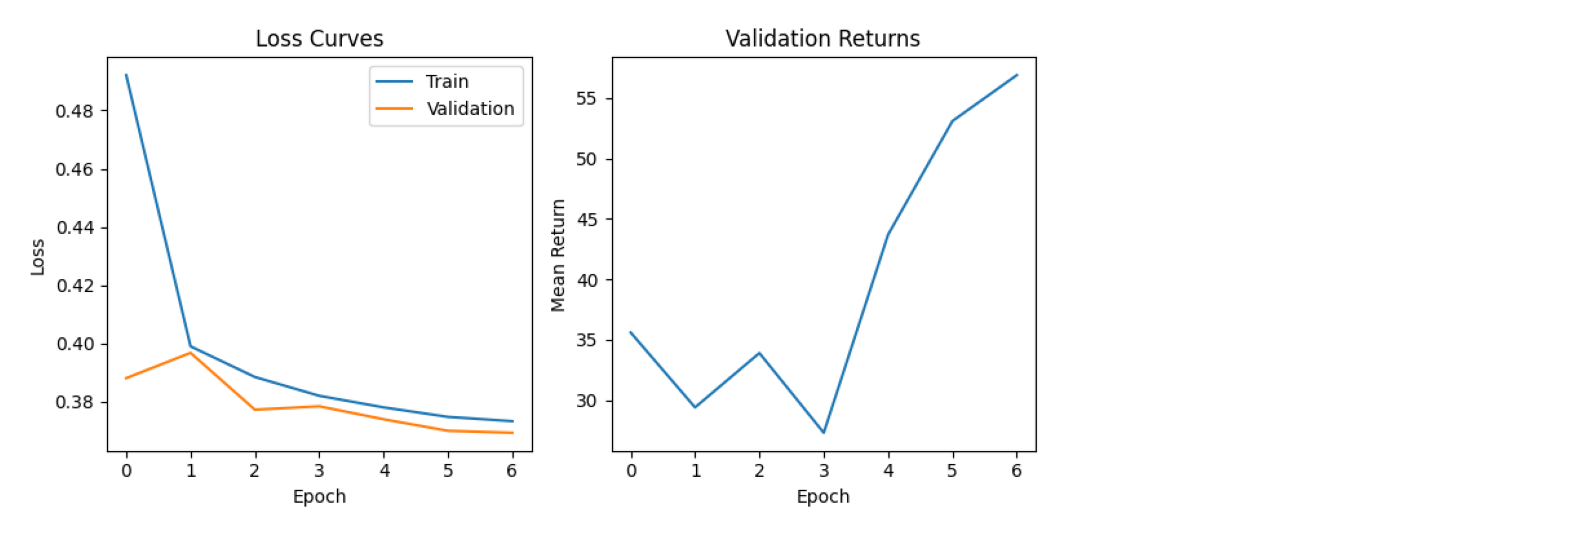

In [40]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(20, 10))
img = mpimg.imread('/content/models/memory_dt_velocity_cartpole_gru_training.png')  # Замените на путь к файлу
plt.imshow(img)
plt.axis('off')  # Отключаем оси
plt.show()


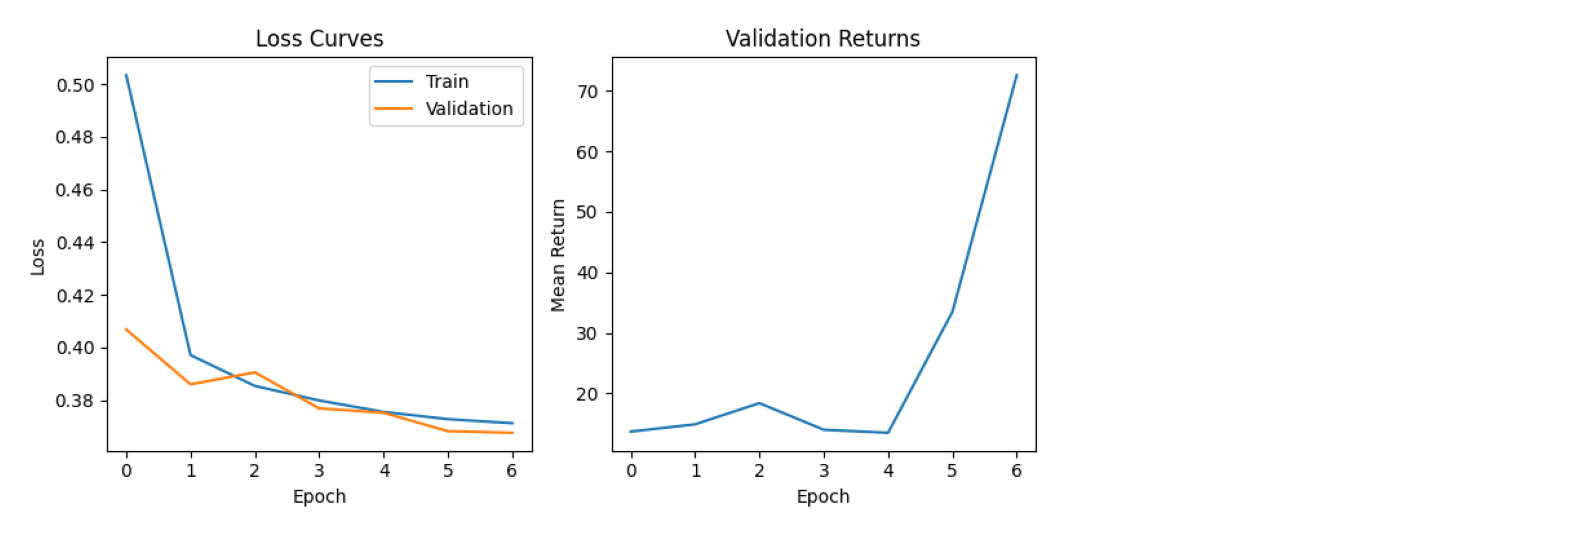

In [41]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(20, 10))
img = mpimg.imread('/content/models/memory_dt_velocity_cartpole_lstm_training.png')  # Замените на путь к файлу
plt.imshow(img)
plt.axis('off')  # Отключаем оси
plt.show()


In [42]:
# Train basic DT
!python run_memory_dt.py --env velocity_cartpole --memory_type none --n_epochs 7 --eval_episodes 20 --context_length 10

# Validate basic DT
#!python utils/visualize_dt_agent.py --env velocity_cartpole --model_path models/memory_dt_velocity_cartpole_None2_best.pt --memory_type none


!python run_memory_dt.py --env velocity_cartpole --memory_type gru --n_epochs 7 --eval_episodes 20 --context_length 10

#!python utils/visualize_dt_agent.py --env velocity_cartpole --model_path models/memory_dt_velocity_cartpole_gru2_best.pt --memory_type gru


!python run_memory_dt.py --env velocity_cartpole --memory_type lstm --n_epochs 7 --eval_episodes 20 --context_length 10

#!python utils/visualize_dt_agent.py --env velocity_cartpole --model_path models/memory_dt_velocity_cartpole_lstm2_best.pt --memory_type lstm

Training Memory Decision Transformer on velocity_cartpole...
Dataset stats: total=49970, train=44973, val=4997, state_dim=2, actions=2
Epoch 1/7 [Train]: 100% 703/703 [00:10<00:00, 69.40it/s, loss=0.3786, avg_loss=0.4938, lr=0.000994]
Epoch 1/7: Train Loss=0.4938, Val Loss=0.4678
Running environment validation...
Episode 1: Return=53.0, Steps=53
Episode 2: Return=44.0, Steps=44
Episode 3: Return=15.0, Steps=15
Episode 4: Return=56.0, Steps=56
Episode 5: Return=35.0, Steps=35
Episode 6: Return=46.0, Steps=46
Episode 7: Return=55.0, Steps=55
Episode 8: Return=42.0, Steps=42
Episode 9: Return=14.0, Steps=14
Episode 10: Return=54.0, Steps=54
Validation: Mean Return=41.40, Success Rate=0.00%
New best model with return 41.40
Epoch 2/7 [Train]: 100% 703/703 [00:10<00:00, 68.46it/s, loss=0.4527, avg_loss=0.4358, lr=0.000899]
Epoch 2/7: Train Loss=0.4358, Val Loss=0.4306
Running environment validation...
Episode 1: Return=64.0, Steps=64
Episode 2: Return=51.0, Steps=51
Episode 3: Return=53.0, S

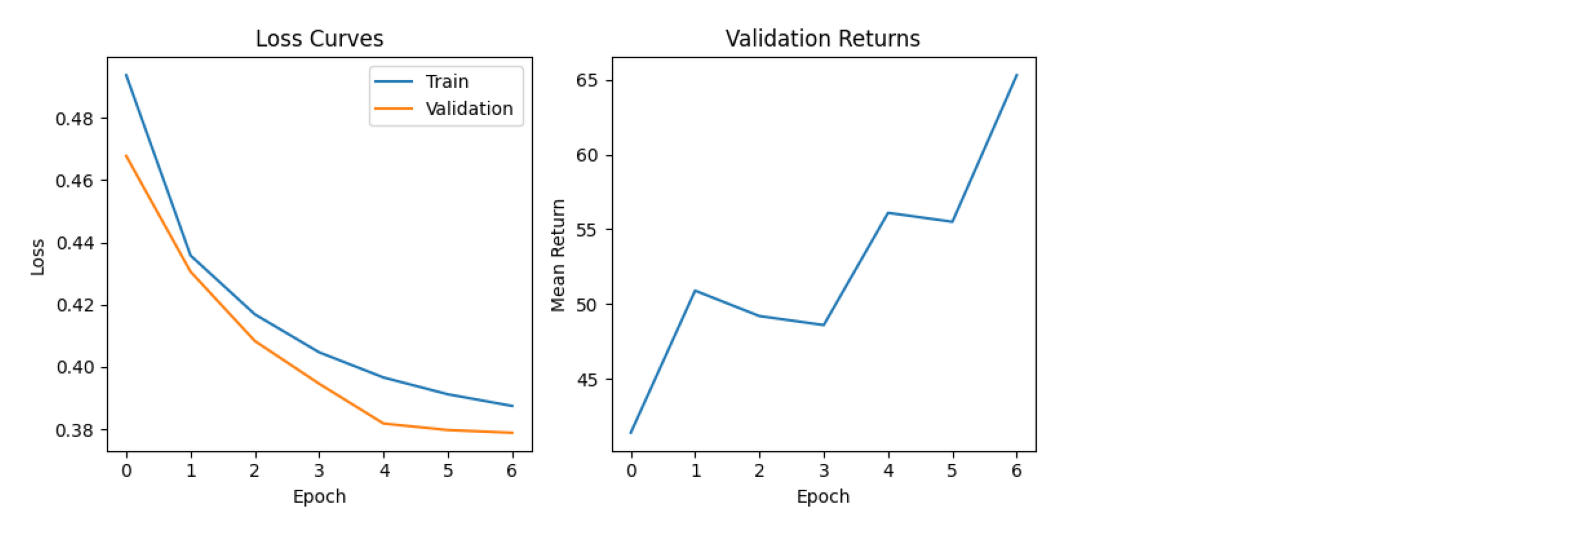

In [43]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(20, 10))
img = mpimg.imread('/content/models/memory_dt_velocity_cartpole_None_training.png')  # Замените на путь к файлу
plt.imshow(img)
plt.axis('off')  # Отключаем оси
plt.show()


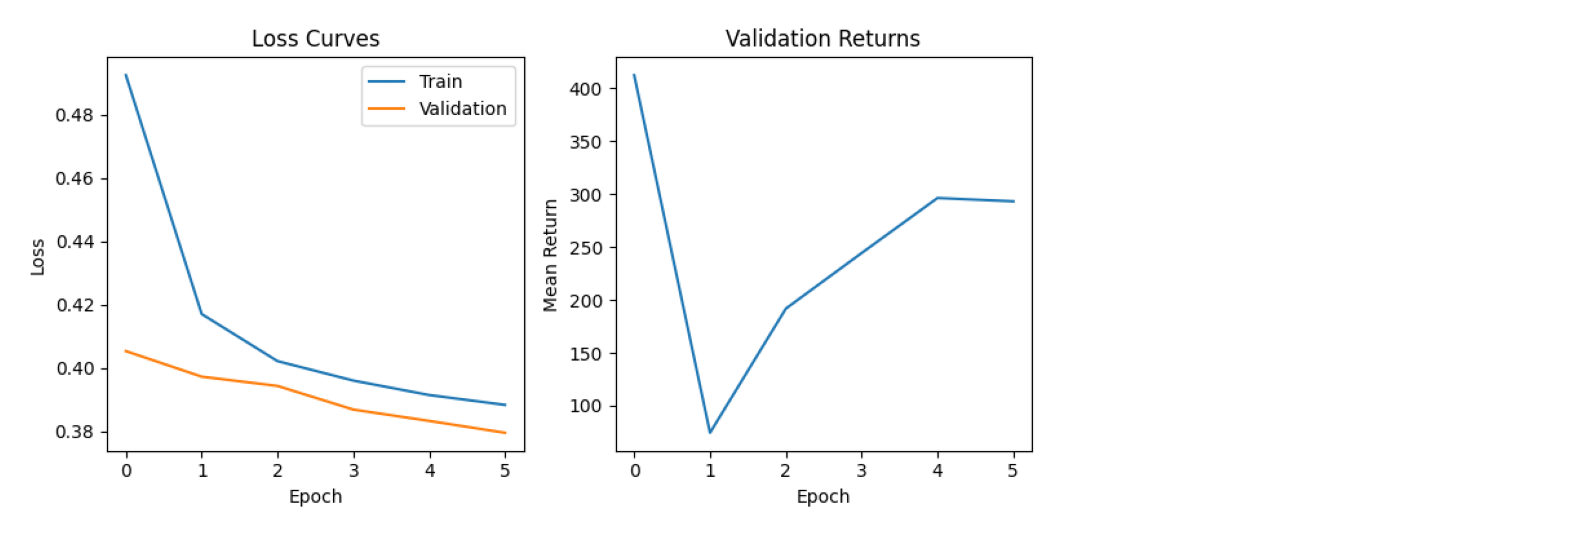

In [44]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(20, 10))
img = mpimg.imread('/content/models/memory_dt_velocity_cartpole_gru_training.png')  # Замените на путь к файлу
plt.imshow(img)
plt.axis('off')  # Отключаем оси
plt.show()


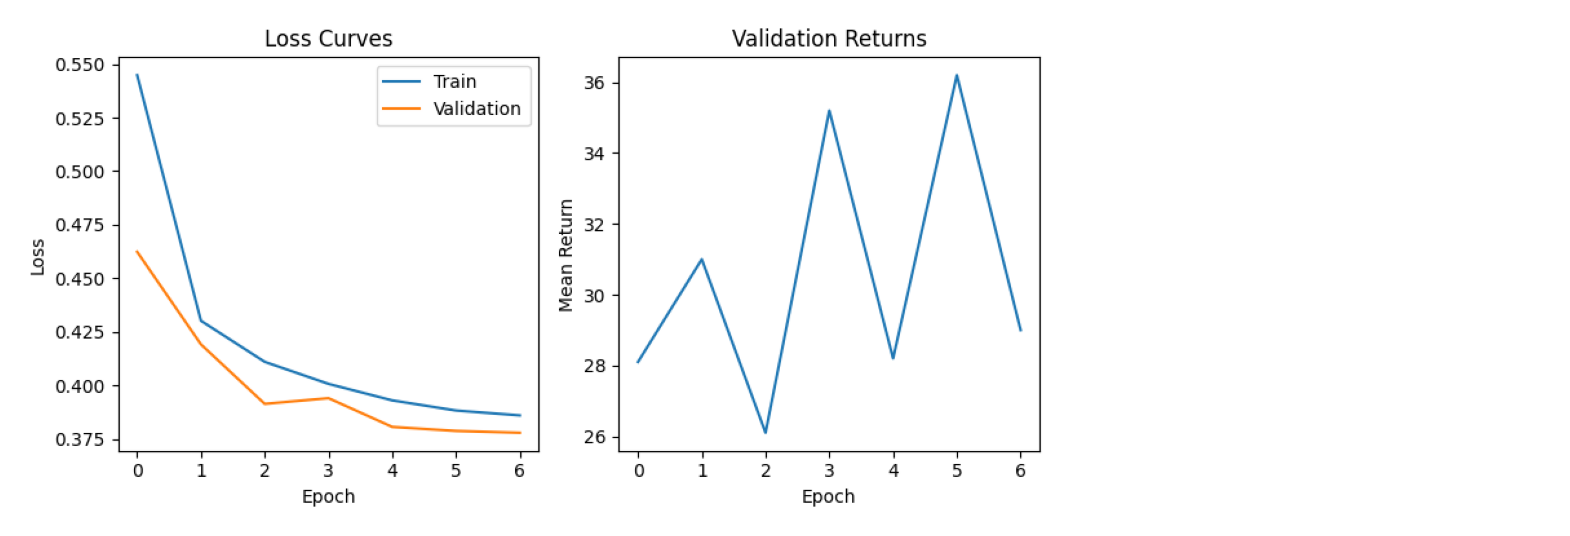

In [45]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(20, 10))
img = mpimg.imread('/content/models/memory_dt_velocity_cartpole_lstm_training.png')  # Замените на путь к файлу
plt.imshow(img)
plt.axis('off')  # Отключаем оси
plt.show()


Слишком большая и слишком маленькая длина контекста очень негативно сказываются на качестве модели, нужна золотая середина

# My Memory

In [21]:
!python /content/train_and_collect_data.py --env velocity_cartpole --train_timesteps 300000 --num_trajectories 100 --reward_threshold 500
!python utils/visualize_ppo_agent.py --env velocity_cartpole --model_path pomdp_datasets/velocity_cartpole/recurrent_ppo_velocity_cartpole.pt --rnn_type gru
!python memory_dt.py --dataset pomdp_datasets/velocity_cartpole --stats_only

Выходные данные были обрезаны до нескольких последних строк (5000).
Episode 826, reward: 88.00, avg_reward (last 50): 39.82, timesteps: 18556/300000
Episode 827, reward: 15.00, avg_reward (last 50): 39.32, timesteps: 18571/300000
Episode 828, reward: 37.00, avg_reward (last 50): 39.34, timesteps: 18608/300000
Episode 829, reward: 86.00, avg_reward (last 50): 39.98, timesteps: 18694/300000
Episode 830, reward: 48.00, avg_reward (last 50): 40.38, timesteps: 18742/300000
Episode 831, reward: 41.00, avg_reward (last 50): 40.52, timesteps: 18783/300000
Episode 832, reward: 24.00, avg_reward (last 50): 40.50, timesteps: 18807/300000
Episode 833, reward: 45.00, avg_reward (last 50): 40.58, timesteps: 18852/300000
Episode 834, reward: 52.00, avg_reward (last 50): 40.76, timesteps: 18904/300000
Episode 835, reward: 58.00, avg_reward (last 50): 41.70, timesteps: 18962/300000
Episode 836, reward: 37.00, avg_reward (last 50): 40.74, timesteps: 18999/300000
Episode 837, reward: 34.00, avg_reward (l

In [33]:
!python run_memory_dt.py --env velocity_cartpole --memory_type attention --n_epochs 7 --eval_episodes 20

Training Memory Decision Transformer on velocity_cartpole...
Dataset stats: total=25940, train=23346, val=2594, state_dim=2, actions=2
Epoch 1/7 [Train]: 100% 365/365 [00:05<00:00, 65.07it/s, loss=0.5247, avg_loss=0.5613, lr=0.000994]
Epoch 1/7: Train Loss=0.5613, Val Loss=0.5053
Running environment validation...
Episode 1: Return=27.0, Steps=27
Episode 2: Return=55.0, Steps=55
Episode 3: Return=76.0, Steps=76
Episode 4: Return=50.0, Steps=50
Episode 5: Return=107.0, Steps=107
Episode 6: Return=68.0, Steps=68
Episode 7: Return=48.0, Steps=48
Episode 8: Return=54.0, Steps=54
Episode 9: Return=60.0, Steps=60
Episode 10: Return=85.0, Steps=85
Validation: Mean Return=63.00, Success Rate=0.00%
New best model with return 63.00
Epoch 2/7 [Train]: 100% 365/365 [00:05<00:00, 68.38it/s, loss=0.4696, avg_loss=0.4854, lr=0.000898]
Epoch 2/7: Train Loss=0.4854, Val Loss=0.4739
Running environment validation...
Episode 1: Return=34.0, Steps=34
Episode 2: Return=43.0, Steps=43
Episode 3: Return=62.0,

In [34]:
!python utils/visualize_dt_agent.py --env velocity_cartpole --model_path models/memory_dt_velocity_cartpole_attention_best.pt --memory_type attention

Model parameters: n_embed=64, n_layer=3, n_head=4, memory_dim=64
action_head structure: Linear
Visualizing velocity_cartpole agent from models/memory_dt_velocity_cartpole_attention_best.pt
Memory type: attention, Context length: 20
error: XDG_RUNTIME_DIR not set in the environment.

Episode 1/5
Target return: 500.0
Step 1: Initial action=0 (default)
Step 2: Action=1, RTG=499.00
Step 3: Action=1, RTG=498.00
Step 4: Action=0, RTG=497.00
Step 5: Action=0, RTG=496.00
Step 6: Action=0, RTG=495.00
Step 7: Action=0, RTG=494.00
Step 8: Action=0, RTG=493.00
Step 9: Action=0, RTG=492.00
Step 10: Action=0, RTG=491.00
Step 11: Action=0, RTG=490.00
Step 12: Action=1, RTG=489.00
Step 13: Action=1, RTG=488.00
Step 14: Action=1, RTG=487.00
Step 15: Action=1, RTG=486.00
Episode 1 finished with reward: 15.0

Episode 2/5
Target return: 500.0
Step 1: Initial action=0 (default)
Step 2: Action=1, RTG=499.00
Step 3: Action=1, RTG=498.00
Step 4: Action=1, RTG=497.00
Step 5: Action=0, RTG=496.00
Step 6: Action

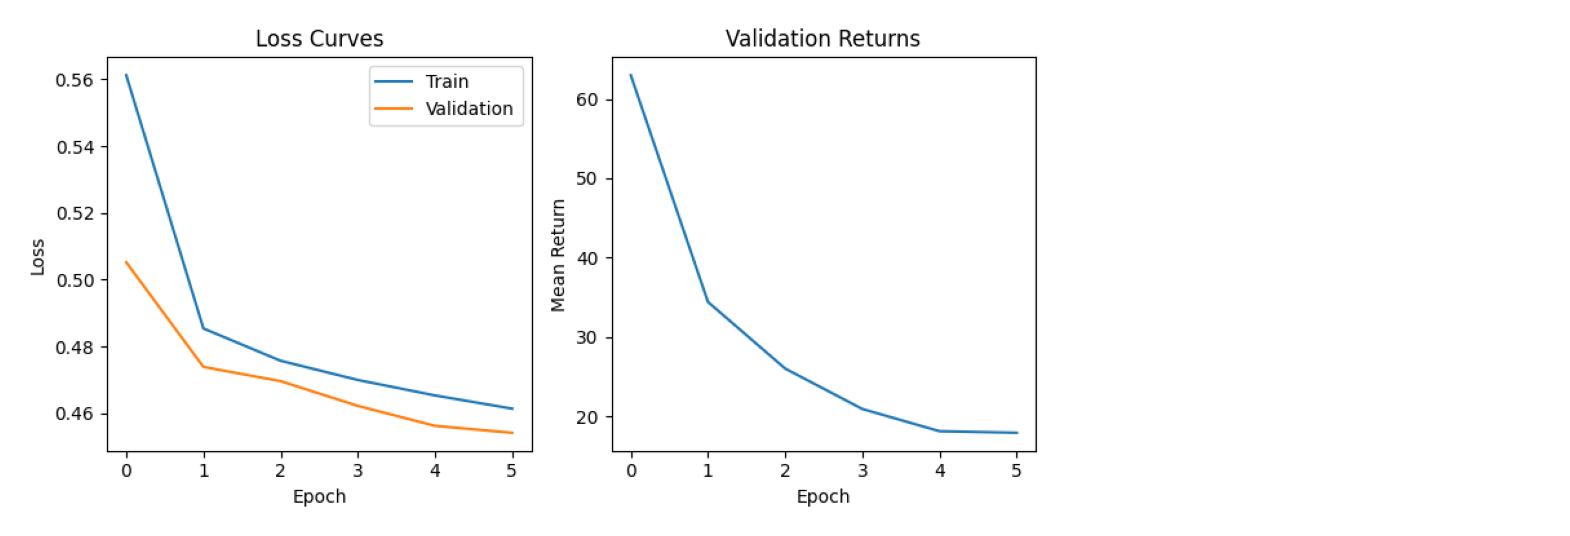

In [35]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(20, 10))
img = mpimg.imread('/content/models/memory_dt_velocity_cartpole_attention_training.png')
plt.imshow(img)
plt.axis('off')
plt.show()


 * 1

Механизм памяти будет обрабатывать:

Состояния (states): векторы признаков среды (например, позиция, скорость).

Действия (actions): дискретные или непрерывные действия, предпринятые агентом.

Return-to-go (rtgs): кумулятивное ожидаемое вознаграждение.

Цель памяти — удерживать краткосрочный контекст, позволяющий агенту учитывать недавние события без использования громоздких RNN (GRU/LSTM).

* 2

Вместо LSTM/GRU используется экспоненциальная память, обновляющая скрытое состояние

* 3

Модель основана на Decision Transformer (DT), но дополнена собственной памятью:

Embed: состояния, действия и RTG кодируются через линейные слои.

Stack: все эмбеддинги конкатенируются по времени.

Memory: на каждом временном шаге применяется наш механизм памяти.

Transformer blocks: применяются после памяти.

Output head: линейный слой предсказывает следующее действие.

Сравнение:

В отличие от GRU/LSTM, наш механизм не требует инициализации h_0, c_0, и легче тренируется.

Подходит для последовательностей средней длины, где важна скорость.



* 4

Преимущества подхода:
Простота: легко реализуется и интерпретируется.

Быстрота: быстрее, чем LSTM/GRU.

Регуляризация: alpha действует как забывание, предотвращая переобучение.

Гибкость: alpha можно сделать обучаемым.